# Programming for Data Analysis (2022)
**Arthur Leblois & Nicolas P. Rougier**, Institute of Neurodegenerative Diseases, Bordeaux, France.  
Course material and program at https://github.com/bordeaux-neurocampus/UE-Programming-for-data-analysis-2022

<img style="align:center;" src="figures/An-Overview-of-EEG-data-clusters-used-in-analysis-and-B-randomly-selected-EEG-time.png">


## Mini-Project 2 // EEG: Analyzing signals from the brain!

The goal of this project is to learn how to manipulate EEG data. In EEG research, recorded raw data that are used in analyses require preparation, also called preprocessing, a process that involves a number of manipulations. During this project you will go over a few key points regarding data preprocessing and analysis.

Some common brain rhythms recorded in the EEG are _alpha_ ($\alpha$), _beta_ ($\beta$), _gamma_ ($\gamma$), _delta_ ($\delta$), and _theta_ ($\theta$). These rhythms are identified by frequency (Hz or cycles/sec) and amplitude and each of them is linked to a different phase of processing in the brain. You can read more in the [EEG introductory lesson](https://www.csun.edu/~vcpsy00i/dissfa01/xEEG_lesson.html).

The data that you will be working with belongs to a single participant performing multiple experimental conditions while wearing a VR headset. During the experimental session, the participant was asked to perform a version of the [Paired Associates Learning (PAL)](https://www.cambridgecognition.com/cantab/cognitive-tests/memory/paired-associates-learning-pal/) task, which is used by clinicians to assess visual memory and new learning in humans. Audio/Visual stimulation was also tested on the participant.

We will take a closer look on the data collected during the equipment calibration step and assess the baseline brain activity of the participant with eyes open and eyes closed (no stimulation). One of the goals of the project is to see if you can identify the subtle differences on the EEG traces and the underlying rhythms.

Since we will be manipulating EEG data, we will have to perform preliminary operations to prepare the dataset for further analyses. One interesting resource is [Makoto's preprocessing pipeline](https://sccn.ucsd.edu/wiki/Makoto%27s_preprocessing_pipeline). This pipeline is developed by Makoto Miyakoshi, affiliated with the [Swartz Center for Computational Neuroscience](https://sccn.ucsd.edu/) and - while mainly developed as a guide for using EEGlab in Matlab - contains a lot of useful information that you should refer to whenever you feel like you do not understand the **what** or **why** we are performing a computation.

**Data** is available as [EEGlab](https://sccn.ucsd.edu/eeglab/index.php) `.set` files in the `data` subfolder. Before you start, please make sure the data directory is under `data` and named `EEG_raw`.

---

**\[Exercises\]** This section contains the exercises you will need to complete.

**(Hint)** For every exercise, hints will be provided that will point you to the right direction. You **will** have to read the documentation and online resources often! If you need extra help, [this blog](https://neuraldatascience.io/7-eeg/mne_python.html) contains a lot of useful information and explanations. Use all of the resources available to you to complete the project!

**Answers:** You can edit these cells directly and submit your answers as this completed notebook. Please include your team number in the filename i.e. `Team_4_project_2_EEG.ipynb`.


**Table of Contents**

* [1. Configuration of the notebook](#1.-Configuration-of-the-notebook)
* [2. Loading libraries](#2.-Loading-libraries)
* [3. Loading data](#3.-Loading-data)
* [4. Visualizing data](#4.-Visualizing-data)
* [5. Preprocessing](#5.-Preprocessing)
* [6. Overview](#6.-Overview)
* [7. A simple analysis](#7.-A-simple-analysis)
* [8. Comparison of eyes open vs eyes closed](#8.-Comparison-of-eyes-open-vs-eyes-closed)
* [9. Outro](#9.-Outro)


---

### 1. Configuration of the notebook

We need first to setup a few options in the notebook such as to have inline plots as well as a nicer output on OSX.  
There is not much to understand here, these options are documented in the [Jupyer notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)

In [1]:
# Ask jupyter to display plots inline
%matplotlib inline

# OSX specific (for a nicer display on "retina" screen)
%config InlineBackend.figure_format = 'retina'

#mne.viz.set_3d_backend("notebook")

**Reminder**: In order to run the code in a specific code cell, you'll have to type `ctrl`+`return` on the selected cell. If you want to run the code and go to the next cell, you'll have to tyle `shift`+`return` (creates a new empty cell if there isn't one below the current cell). If you do that manually, you'll have to run each cell from top to bottom (order is important). If you want to run all the cell, you can also click the run button at the top of the notebook. To edit a cell (code or text), double-click in it.

---

### 2. Loading libraries

Next step is to load all the Python libraries that will be needed for processing & displaying our data. Namely:
* [NumPy](https://www.numpy.org/) which is the fundamental package for scientific computing with Python.
* [MNE](https://mne.tools/stable/index.html) is the main EEG analysis toolbox that we will use


In [2]:
# Operating System calls, used to standardize file I/O across operating systems
import os

# Numerical package (we are importing numpy using the alias np)
import numpy as np

# From Matplotlib we will need PyPlot (using the alias plt)
import matplotlib.pyplot as plt

# Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data
import mne
# mne.viz.set_3d_backend("notebook")

In [3]:
# Test your installation
mne.sys_info()

Platform:         Windows-10-10.0.22000-SP0
Python:           3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:30:19) [MSC v.1929 64 bit (AMD64)]
Executable:       C:\Users\MARIA\anaconda3\envs\mne\python.exe
CPU:              Intel64 Family 6 Model 140 Stepping 1, GenuineIntel: 8 cores
Memory:           11.6 GB

mne:              1.2.1
numpy:            1.23.4 {unknown linalg bindings}
scipy:            1.9.3
matplotlib:       3.6.0 {backend=module://matplotlib_inline.backend_inline}

sklearn:          1.1.3
numba:            0.56.3
nibabel:          4.0.2
nilearn:          0.9.2
dipy:             1.5.0
openmeeg:         Not found
cupy:             Not found
pandas:           1.5.1
pyvista:          0.36.1 {OpenGL 4.5.0 - Build 30.0.101.1960 via Intel(R) Iris(R) Xe Graphics}
pyvistaqt:        0.9.0
ipyvtklink:       0.2.2
vtk:              Not found
qtpy:             2.2.1 {PyQt5=5.15.6}
ipympl:           Not found
pyqtgraph:        0.13.1
pooch:            v1.6.0

mne_bids: 

If all checks out and you get no errors, let's move on to loading some data!

---

### 3. Loading data

The first thing to do is to load some data from a local file that should be present in your `EEG_raw` directory. To do that, we will load the file `eyes_closed`. This datasets was recorded, as the title suggests, with the participant sitting on the experimental chair with their eyes closed.

In [4]:
# Importing the eyes-closed data
filename = 'eyes_closed.set'
data_dir = os.path.abspath('data')
EEG_dir = os.path.join(data_dir, 'EEG_raw')
data_file = os.path.join(EEG_dir, filename)
montage_file = os.path.join(data_dir, 'ElectrodeLoc.xyz')

# Read the EEG data
eeg_raw = mne.io.read_raw_eeglab(data_file, ['VEOG', 'HEOG'])

Reading C:\Users\MARIA\Desktop\ProgData\mini-project 2\data\EEG_raw\eyes_closed.fdt


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\14762782.py:9: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['VEOG', 'HEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg_raw = mne.io.read_raw_eeglab(data_file, ['VEOG', 'HEOG'])


The data `eeg_raw` is in MNE's `raw` format. This is the basis of our subsequent analyses. A good starting point can be found [here](https://mne.tools/dev/auto_tutorials/raw/10_raw_overview.html).

**\[Exercises\]** Identify the following parameters of the dataset:
* How many channels are there?
* What is the _sampling frequency_ of the data?


**(Hint)** Use the `info` structure from the RAW EEG object.

In [5]:
#number of channels (nchan)
#sampling frequency (sfreq)
print(eeg_raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F11, F7, F5, F3, F1, FZ, F2, F4, F6, ...
 chs: 67 EEG, 2 EOG
 custom_ref_applied: False
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 1000.0 Hz
>


**Answers:**

---

### 4. Visualizing data

Great! If everything went smoothly, you now have loaded the EEG data in the variable `eeg_raw`. Let's visualize the data and quickly inspect the channels.

**\[Exercise\]** Plot the time series of the first 15 channels starting at 70 seconds until 80 seconds.

<details>
    <summary> <b> (Hint) </b> </summary>
    There are multiple plotting functions in the [MNE documentation](https://mne.tools/stable/overview/index.html)? Which function should we use?
</details>

**Answers**: 

[VI] Plotting the data, visual inspection...
------------------------------------------------
Using matplotlib as 2D backend.


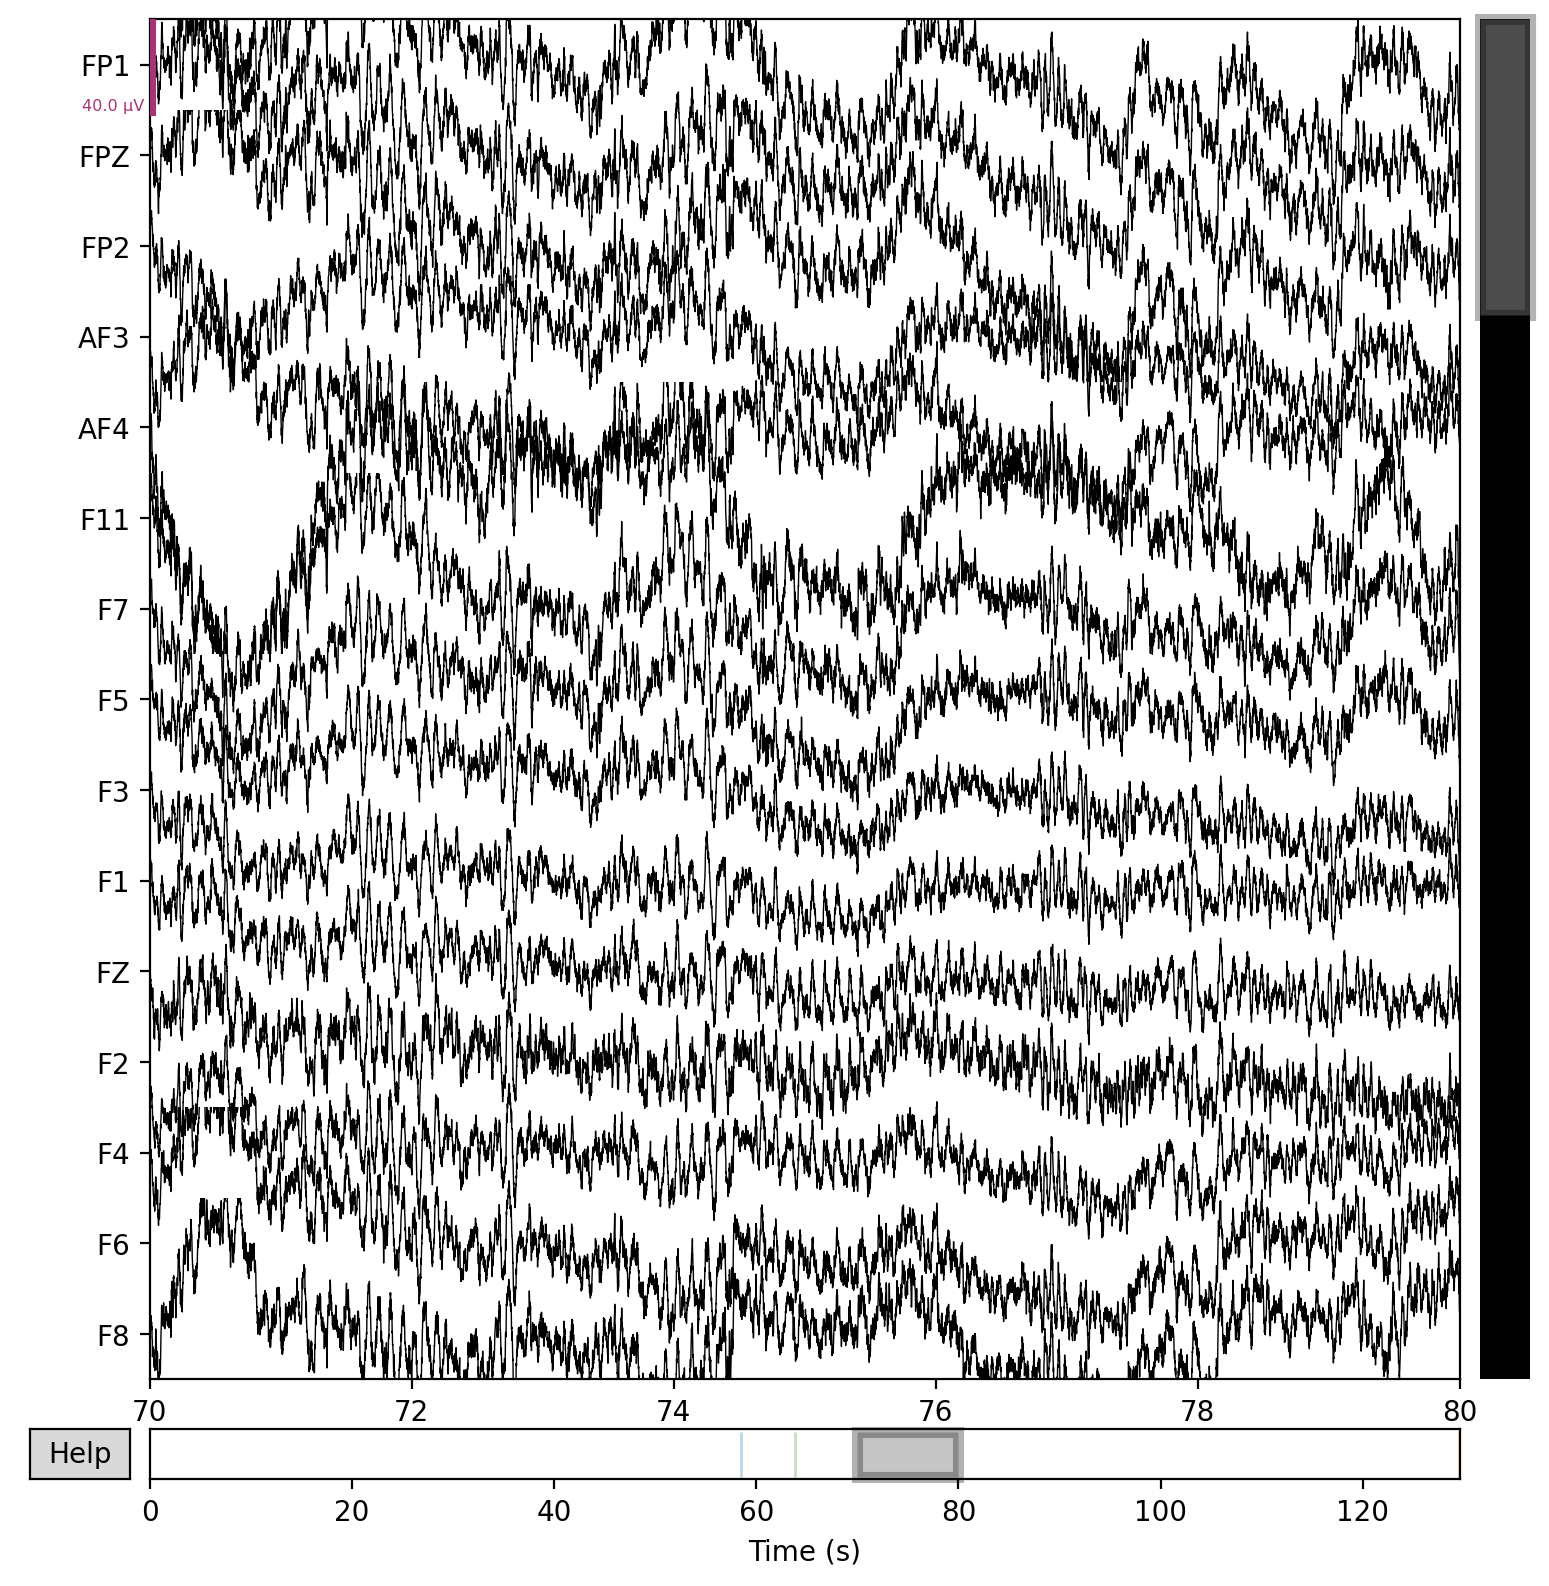

In [6]:
print("[VI] Plotting the data, visual inspection...")
print('-'*48)
with mne.viz.use_browser_backend('matplotlib'):
   fig = eeg_raw.plot(n_channels=15, start=70, duration=10)

In [7]:
eeg_raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F11, F7, F5, F3, F1, FZ, F2, F4, F6, ...
 chs: 67 EEG, 2 EOG
 custom_ref_applied: False
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 1000.0 Hz
>

#### EEG sensors (Montage)

The EEG sensors with their positions are given in the _montage_ (which can be found in the `info` structure). We will plot the default montage in 2D and visualize the sensors below. In our dataset, the positions of the sensors are given in `mm`; however, MNE assumes that positions are in `meters` instead. This will create conflicts. How can we fix this discrepancy?

**\[Exercises\]** Follow the steps below to convert the positions of the electrodes from `meters` to `mm`
* Get the montage from the `eeg_raw` dataset
* Transform the coordinates from `mm` to `meters`
* Set the montage of the `eeg_raw` dataset to the corrected one



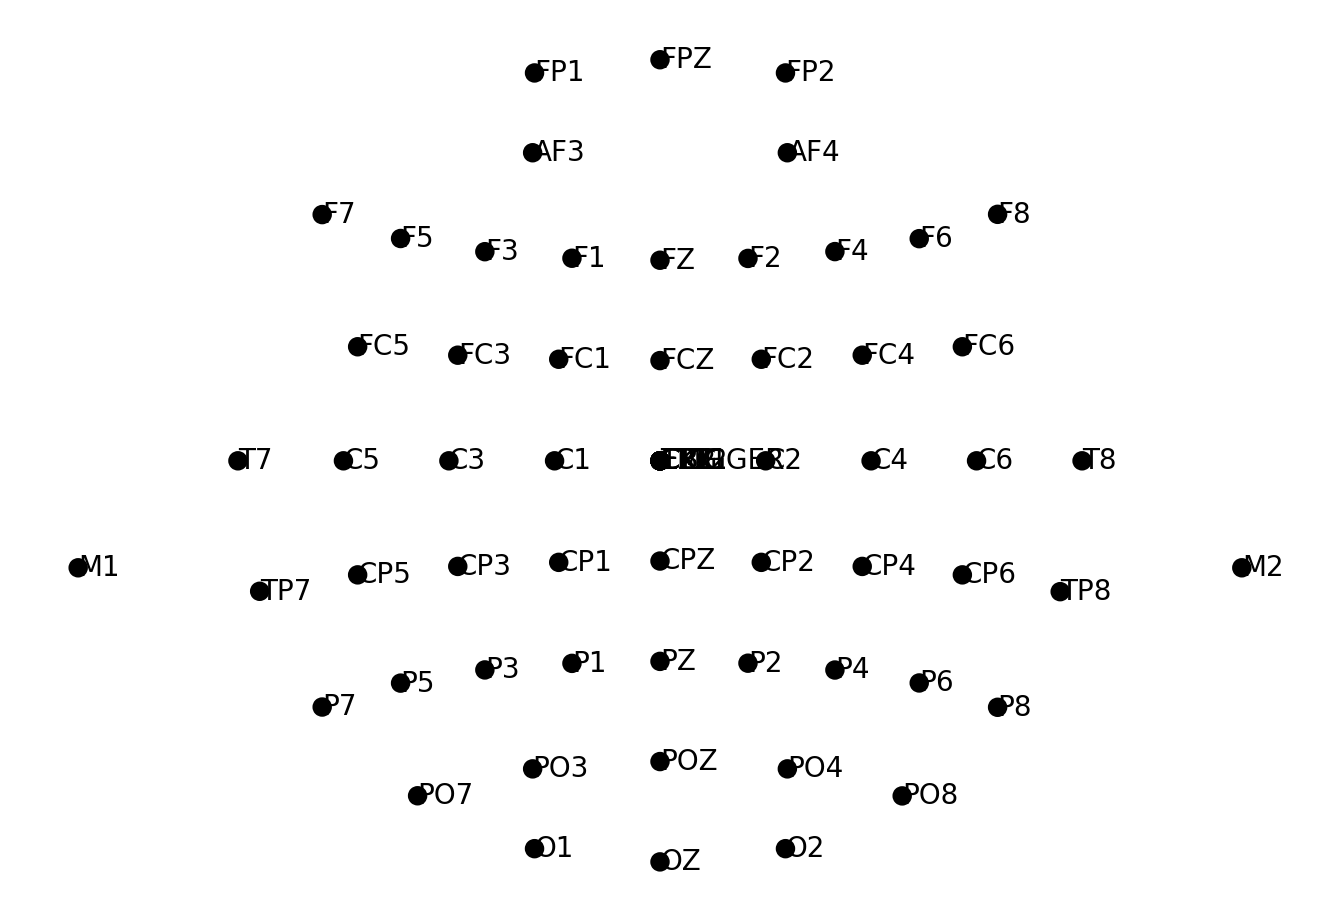

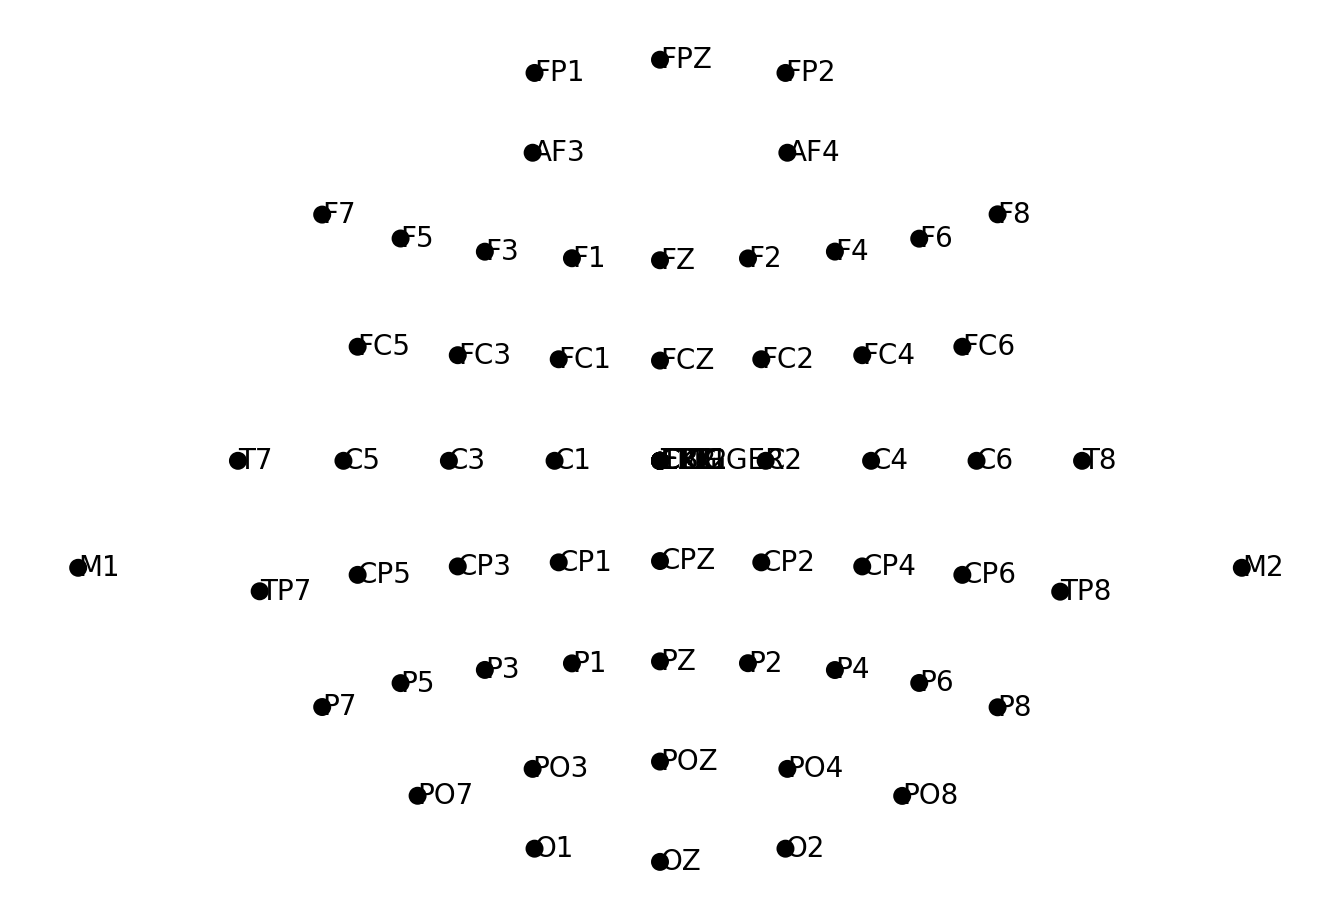

In [8]:
# Get the default montage, 2D
default_montage = eeg_raw.get_montage()
default_montage.plot() 

In [9]:
# Fix the montage size and positions
for idx in np.arange(len(default_montage.dig)):
    default_montage.dig[idx]['r'] /= 1000

In [10]:
# Set the updated montage on the dataset
eeg_raw.set_montage(default_montage, on_missing='ignore')

<RawEEGLAB | eyes_closed.fdt, 69 x 129600 (129.6 s), ~96 kB, data not loaded>

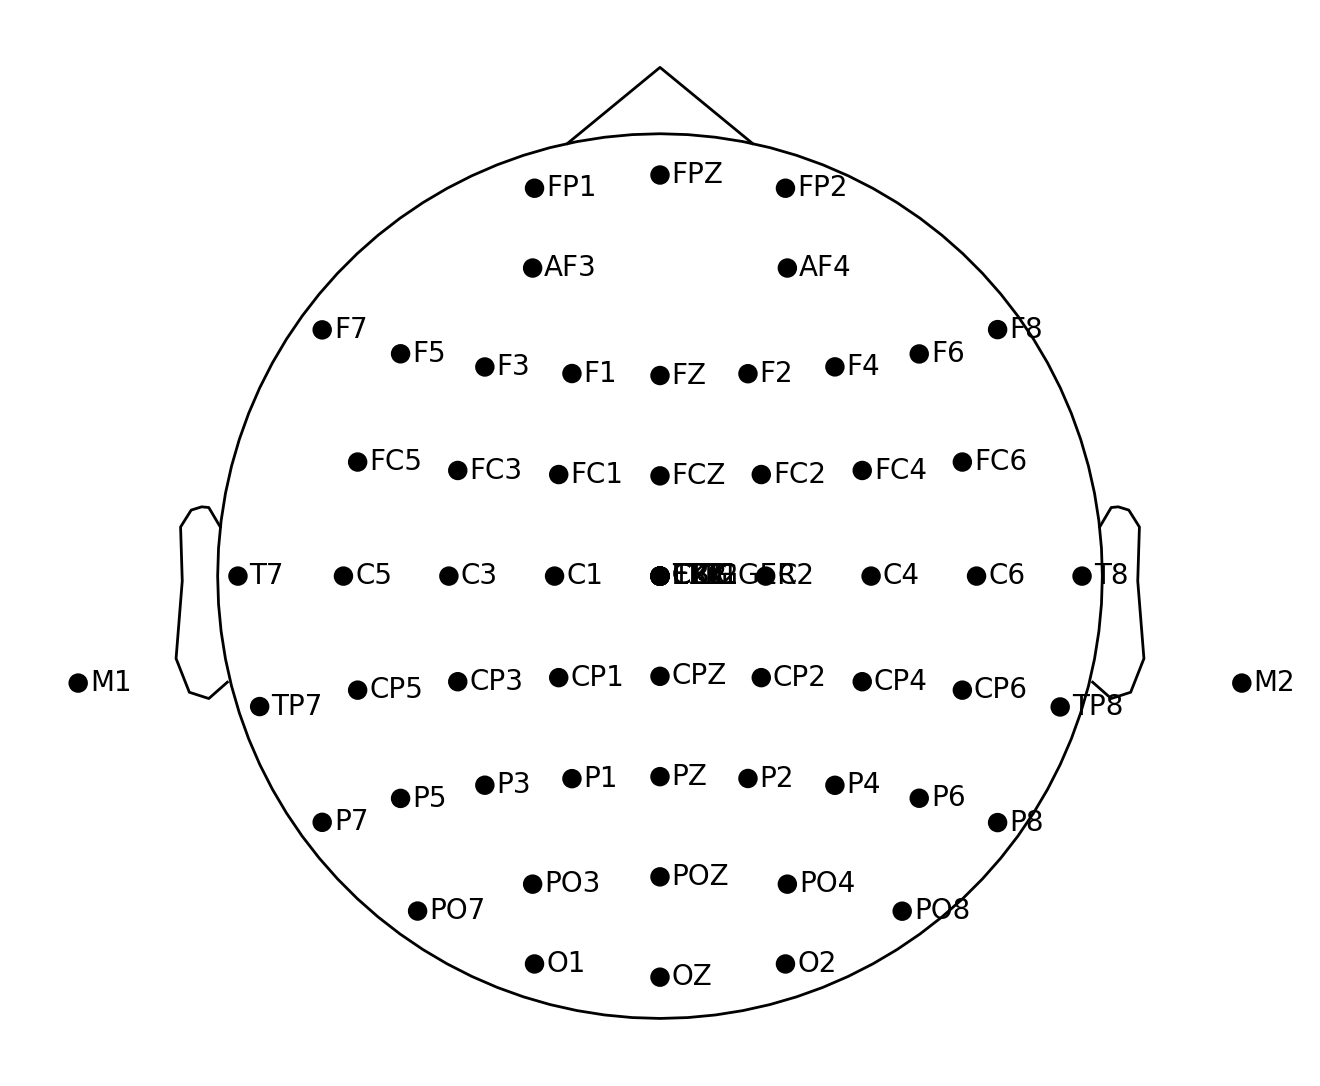

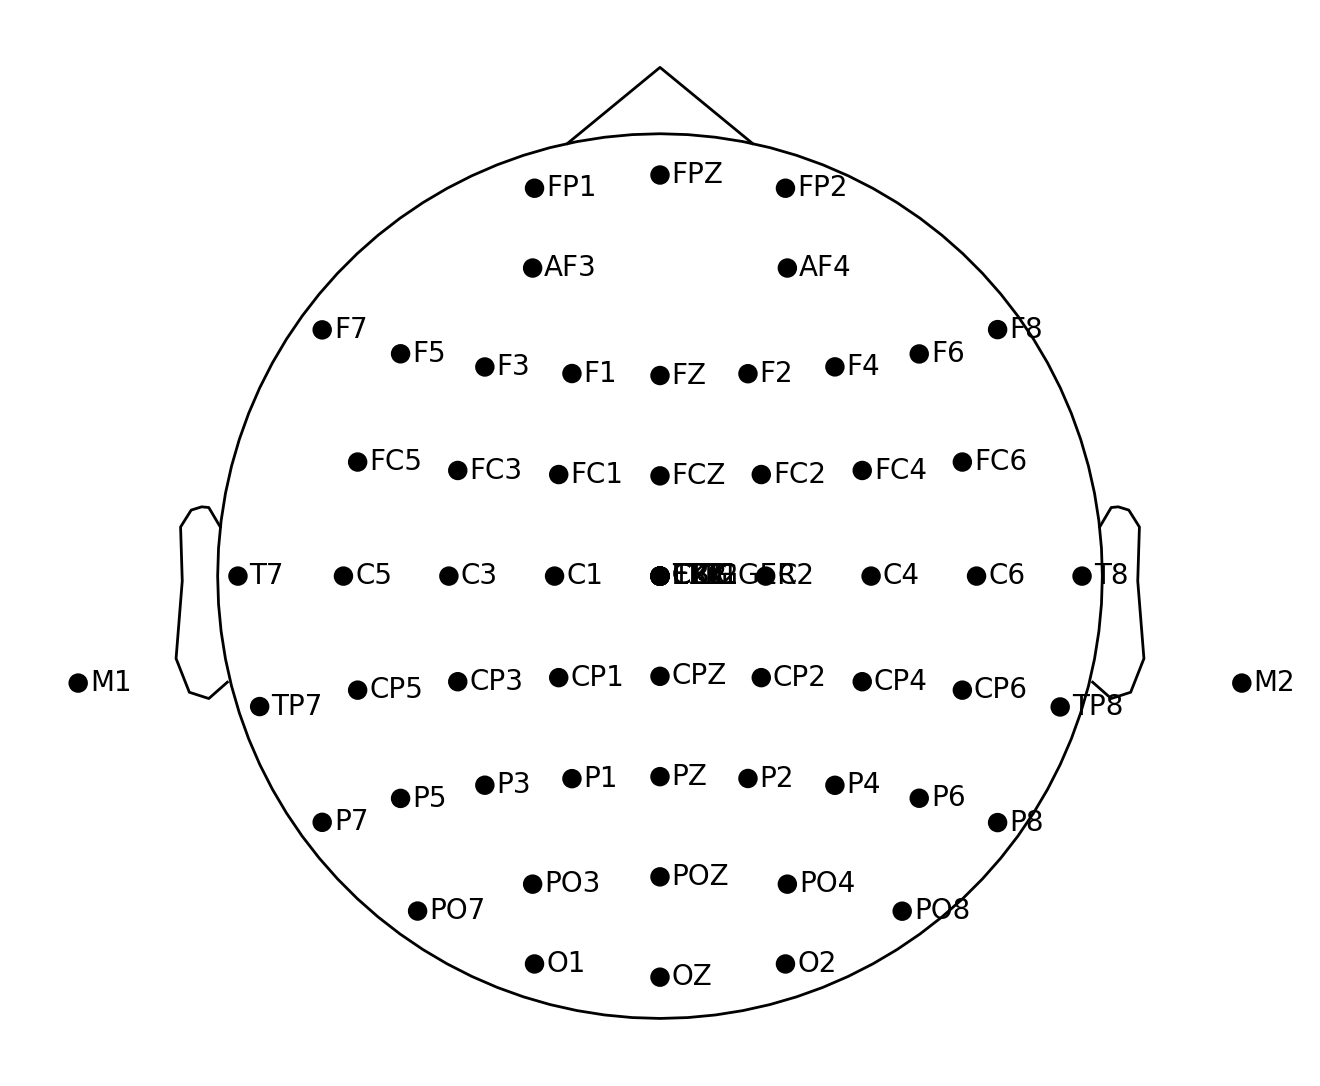

In [11]:
# Plot the sensors montage
eeg_raw.plot_sensors(show_names=True)

---

### 5. Preprocessing

Our attention will now turn towards some basic preprocessing steps to make our data usable.

Our first step is to remove unwanted channels that hold no useful information. Initially, we will keep all the EEG channels and discard the rest.

**\[Exercises\]**
* Read the documentation to identify ways of marking and removing channels from the dataset
* We want to keep only the 64 EEG channels and remove all others. Print the names of the channels you removed. Which channels did you remove? How many channels are left?

**(Hint)** During the exploratory phase of your analysis, where you might want to try out the effects of different data cleaning approaches, you should get used to patterns like `raw.copy().filter(...).plot()` if you want to avoid having to re-load data and repeat earlier steps each time you change a computation!

**Answers:** 

In [12]:
eeg_raw.info['ch_names']

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F11',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'F12',
 'FT11',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT12',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M1',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POZ',
 'PO4',
 'PO8',
 'O1',
 'OZ',
 'O2',
 'CB1',
 'CB2',
 'VEOG',
 'HEOG',
 'EKG',
 'EMG',
 'TRIGGER']

In [13]:
# Remove all non-EEG channels (idxs over the 64th channel)
eeg_non_EEG = eeg_raw.copy()
eeg_corrupt = eeg_raw.copy()
eeg_raw_temp = eeg_raw.copy()
print('Number of channels in raw_temp:')
print(len(eeg_raw_temp.ch_names), end=' → drop five → ')
eeg_raw_temp.drop_channels(['VEOG','HEOG', 'EKG', 'EMG', 'TRIGGER'])

Number of channels in raw_temp:
69 → drop five → 

<RawEEGLAB | eyes_closed.fdt, 64 x 129600 (129.6 s), ~92 kB, data not loaded>

In [14]:
# Remove all channels in the list
bad_chans = ['F11', 'F12', 'FT11', 'FT12', 'CB1', 'CB2', 'M1', 'M2']
bad_chans += eeg_raw.ch_names[64:]
print(bad_chans)
eeg_raw.drop_channels(bad_chans, on_missing='raise')

['F11', 'F12', 'FT11', 'FT12', 'CB1', 'CB2', 'M1', 'M2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER']


<RawEEGLAB | eyes_closed.fdt, 56 x 129600 (129.6 s), ~85 kB, data not loaded>

In [15]:
# Print all the channels that will be removed
bad_chans = eeg_non_EEG.ch_names + eeg_corrupt.ch_names
print('[-] Removing channels...', bad_chans)

[-] Removing channels... ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F11', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F12', 'FT11', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT12', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M1', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER', 'FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F11', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F12', 'FT11', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT12', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M1', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER']


In [16]:
# Apply the removal
eeg_chrm = eeg_raw.copy()
print('[CH] Remaining {0} channels...'.format(len(eeg_chrm.ch_names)), eeg_chrm.ch_names)

[CH] Remaining 56 channels... ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2']


#### (a) FILTERING

Now that we have removed unwanted channels, our next step is to **filter** the remaining data to remove sources of noise and artifacts. We will remove high frequency components (above $200 Hz$) first. Then, we will filter our data to remove very low frequency components that are responsible for linear trends in our data (usually with a cuttoff frequency of $0.1$ - $1 Hz$). Finally, we will apply what is called a _notch filter_ to remove noise caused from electrical power lines. In the EU, electrical equipment operates at $50 Hz$ and thus noise is caused at the same frequency, whereas in North American countries, this frequency component is higher at $60 Hz$.

**Note:** While the details might change across datasets and depend on the analysis you intend to do, the procedure remains largely the same. You can easily generalize the following steps for a different dataset in your own work.

**Note #2** A very comprehensive (and highly-technical) overview on filtering can be found in the [MNE docs](https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html). Keep it for future reference.

#### a. Low-pass filtering

Our first step is to apply a low-pass filter on our data and discard frequencies above 200 Hz. You have learned how filtering works during our lectures, so we won't go into more details here.

#### b. High-pass filtering

A high-pass filter allows us to discard the low frequency components that correspond to what is called the DC-offset. This is almost equivalent to _linearly detrending_ the data.

#### c. Notch filtering

The notch filter will remove any line noise in our data. As stated above, the power lines in the EU operate at $f_0=50 Hz$. We will also remove the first and second harmonics of this signal, which are the frequencies $2f_0 = 100 Hz$ and $3f_0 = 150 Hz$.

**\[Exercises\]**
* Find in the documentation the filtering functions.
* Apply a low-pass filter to the EEG channels with a cuttoff frequency of $f_{cl} = 200 Hz$
* Apply a high-pass filter to the EEG channels with a cuttoff frequency of $f_{ch} = 1 Hz$
* Apply a notch filter to the EEG channels at the frequency $f_{notch} = 50Hz$ and the two first harmonics

<details>
    <summary> <b> (Hint) </b> </summary>
    For implementation details, you can use the information found in the MNE documentation <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.filter">here - filter func</a> and <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.notch_filter">here - notch filt func</a>.
</details>

**Answers:** 

In [17]:
#filtering
# Load the data in memory - required for the filtering
eeg_filt = eeg_raw.copy()
eeg_filt.load_data()
# Low-pass filter-lower 200Hz, Higher 1Hz
eeg_filt.filter(1,200)

Reading 0 ... 129599  =      0.000 ...   129.599 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.4s finished


<RawEEGLAB | eyes_closed.fdt, 56 x 129600 (129.6 s), ~55.5 MB, data loaded>

In [18]:
# Notch filter
print('[Notch] Filtering the data...')
print('-'*32)
#numpy.arange start, stop, step
notch_freqs = np.arange(50,151,50) # Europe
eeg_filtered =eeg_filt.copy()
eeg_filtered.notch_filter(notch_freqs)

[Notch] Filtering the data...
--------------------------------
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.5s finished


<RawEEGLAB | eyes_closed.fdt, 56 x 129600 (129.6 s), ~55.5 MB, data loaded>

#### Unfiltered data

Let's plot the unfiltered data, like we did before, followed by the `info` dictionary:

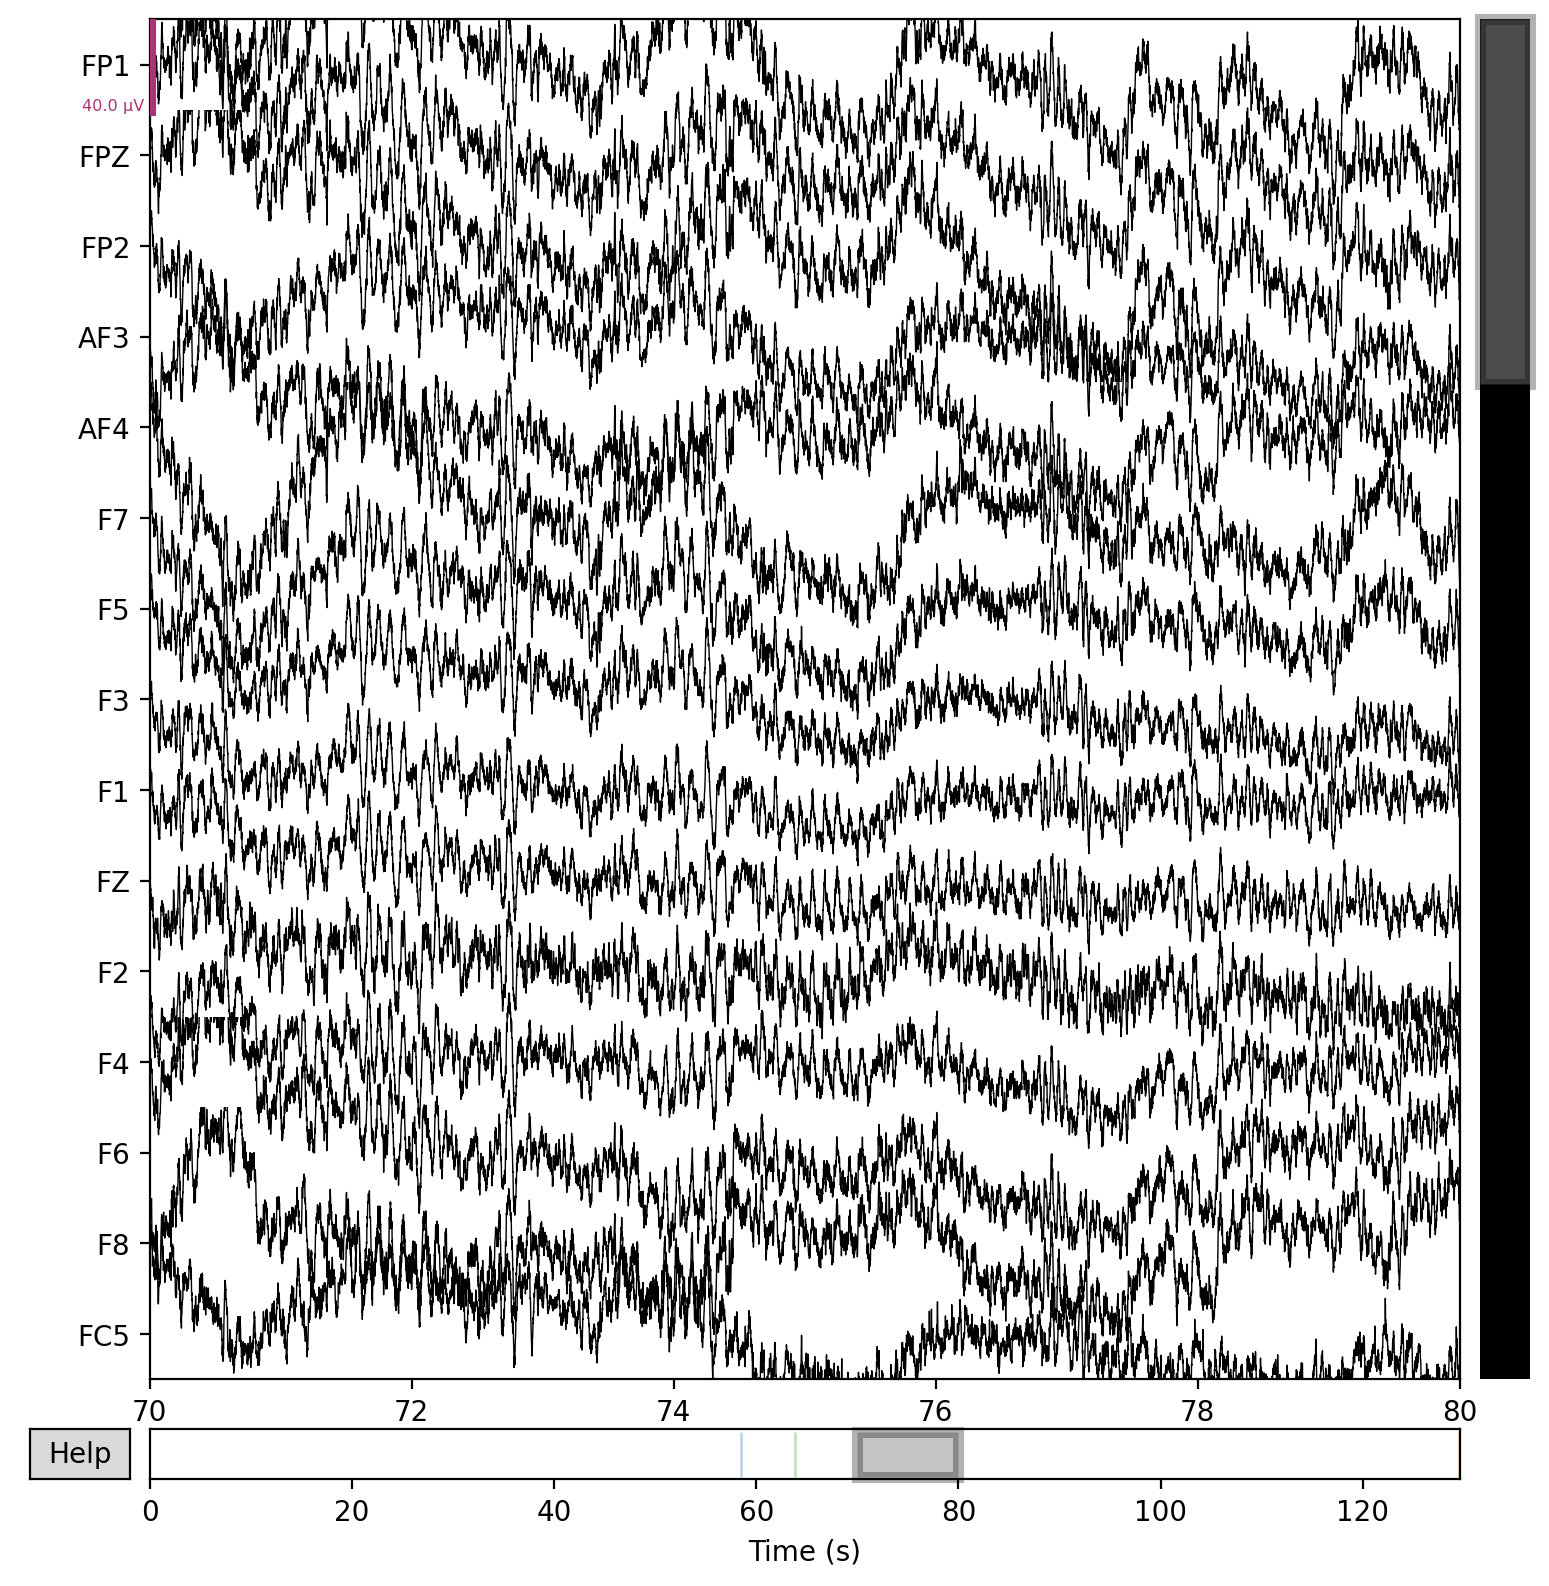

In [19]:
with mne.viz.use_browser_backend('matplotlib'):
    fig = eeg_raw.plot(n_channels=15, start=70, duration=10)

#### Filtered data

Let's do the same for the filtered data:

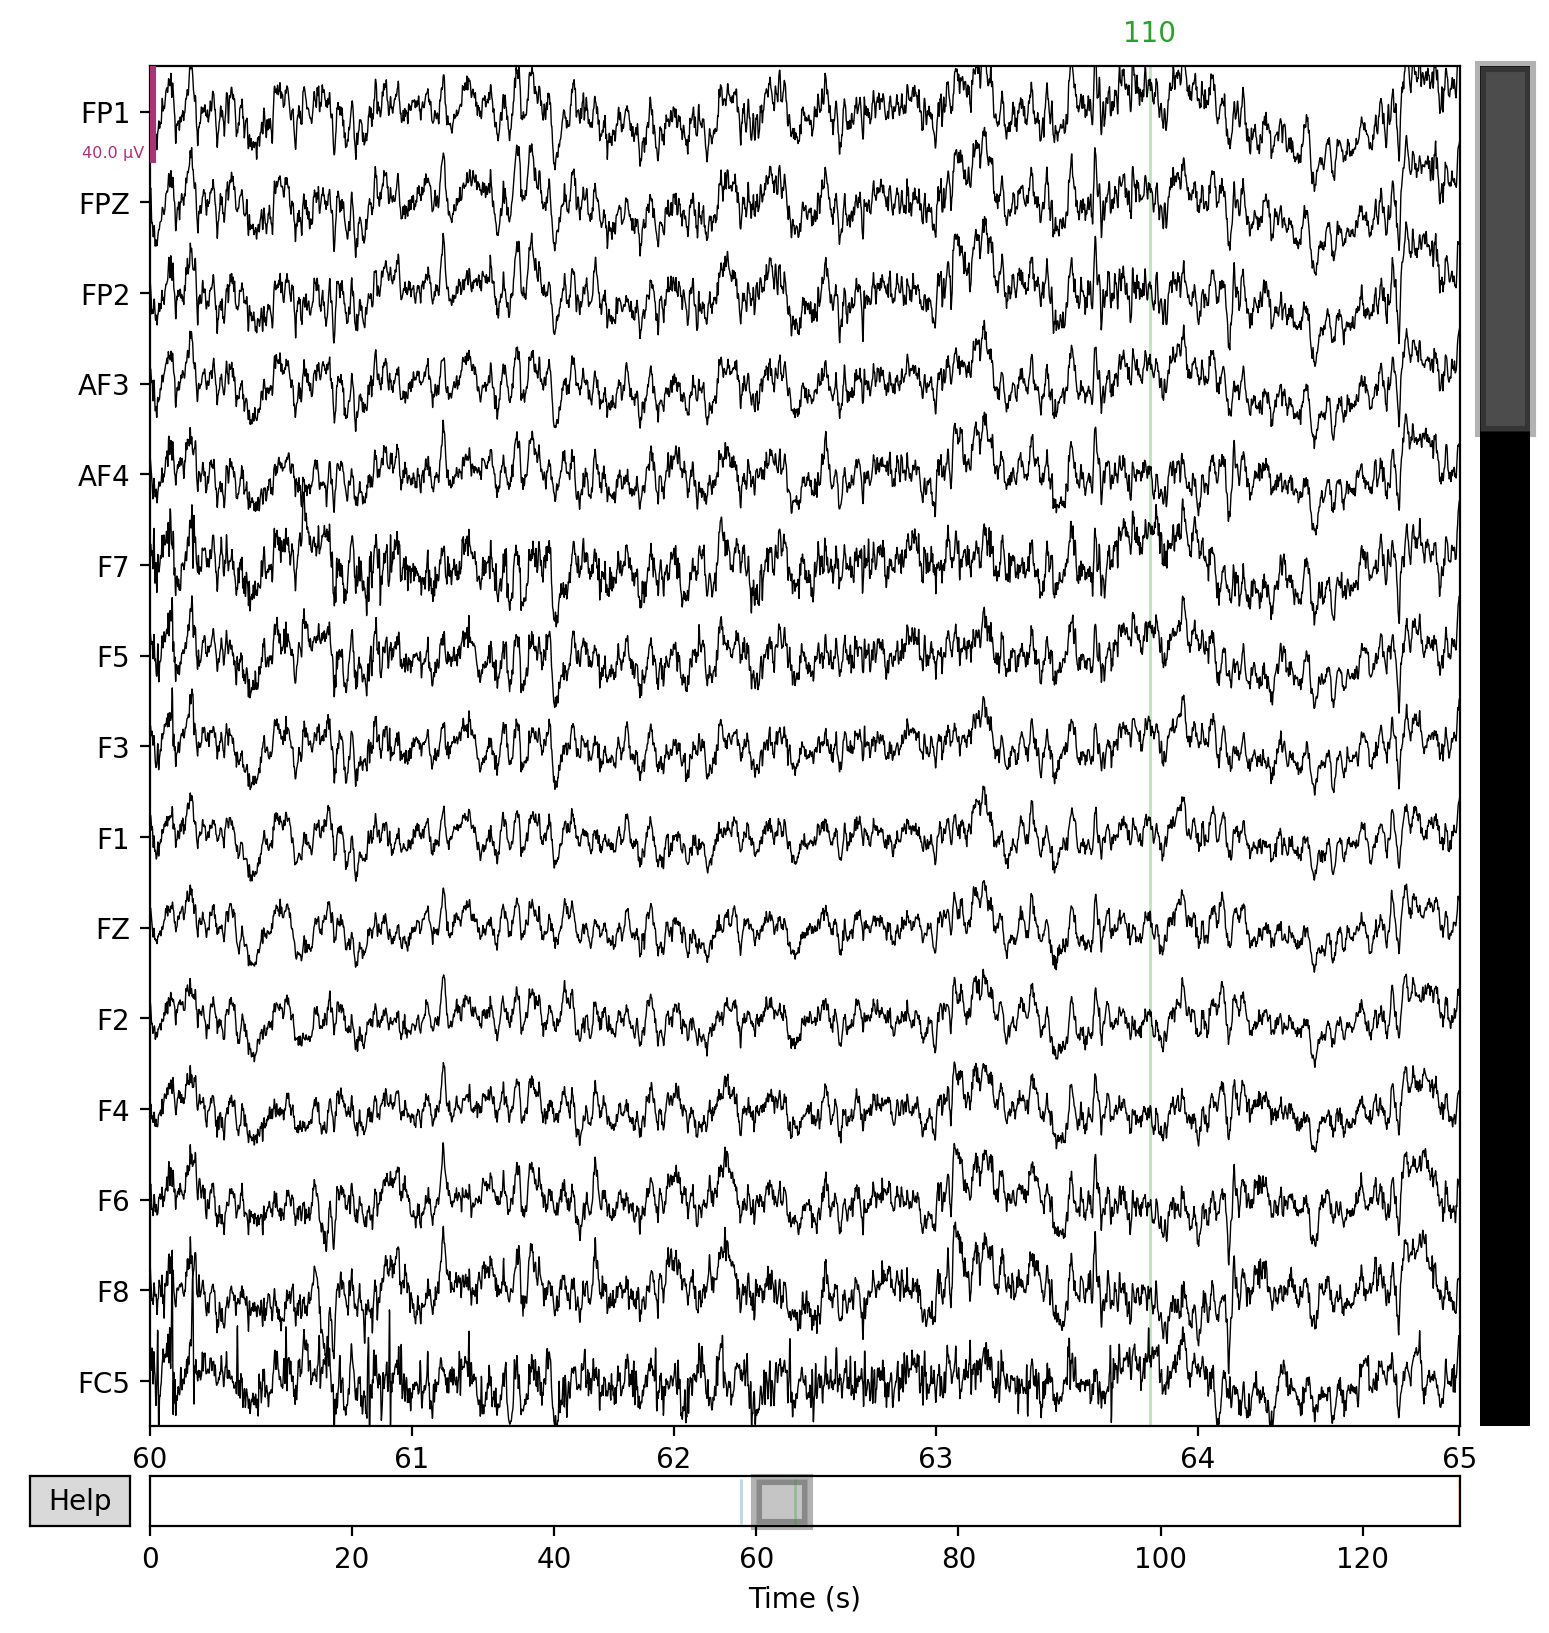

In [20]:
#visualize filtered data
with mne.viz.use_browser_backend('matplotlib'):
    fig = eeg_filtered.plot(n_channels=15, start=60, duration=5)

Great! Can you see the difference between the pre- and post-filtering traces? There are a few giveaways that the filtering has worked. Can you spot them?

#### (b) EPOCHING

Now that we have filtered the data, we can move on to the next step - **epoching**! This is just another name to describe the process of cutting the raw data into pieces that contain only the relevant data for our analyses. For this specific dataset, we will do this using the event numbers that are included in the dataset. In the data you loaded, you might have noticed there are three discrete `EVENTS`, marked on the dataset. Events are used to mark points of interest, like when the trial starts or when a stimulus is presented. Events in the dataset are presented in the form of `annotations`. You can easily spot them using the interactive `plot` function of the raw data.

Now that we have an idea of how our data looks like, we can make a few observations. For example, you may have noticed that at the beginning the data looks very noisy compared to 60 seconds in the recording. In later steps, we will learn how to cut unwanted parts of our signals that are outside the trial timeline, and filter out unwanted frequency components.


The events (and their codes) are:
- `100`: system is synchronized and we are ready to execute the trial
- `110`: trial start
- `101`: trial end

Now that you know the events and their meaning, solve the following exercises.

**\[Exercise\]**
* Find the events and note their codes on the dataset.
* Extract the events from the dataset.
* Remove event `100` since it is not needed
* Epoch the data between event `110` and `101`.

<details>
    <summary> <b> (Hint) </b> </summary>
    We mentioned how our events are included in the form of annotations on the data. How would you extract the `events` (timing and code) from these annotations?
</details>

In [21]:
# print("[E] Epoching the data...")
annotations = eeg_filtered.annotations

#Print the annotations
for idx in range(len(annotations)):
    print('Annotation ID:', annotations[idx]['description'], ' onset: ', annotations[idx]['onset'], 's')

Annotation ID: 100  onset:  58.543 s
Annotation ID: 110  onset:  63.817 s
Annotation ID: 101  onset:  129.529 s


In [22]:
print(annotations)

<Annotations | 3 segments: 100 (1), 101 (1), 110 (1)>


In [23]:
for idx in range(len(annotations)):
    print(idx, annotations[idx])

0 OrderedDict([('onset', 58.543), ('duration', 0.0), ('description', '100'), ('orig_time', None)])
1 OrderedDict([('onset', 63.817), ('duration', 0.0), ('description', '110'), ('orig_time', None)])
2 OrderedDict([('onset', 129.529), ('duration', 0.0), ('description', '101'), ('orig_time', None)])


In [24]:
# Crop the data
eeg_cropped = eeg_filtered.copy().crop(tmin=63.817, tmax=129.529, include_tmax=True)
print(eeg_cropped.annotations)

<Annotations | 2 segments: 101 (1), 110 (1)>


#### (c) DOWNSAMPLING

Now that we have filtered our dataset, we can **downsample** the channels to save space and speed up our computations. One thing to always keep in mind when downsampling is to avoid what is called _[aliasing](https://en.wikipedia.org/wiki/Aliasing)_, which is a form of artifact that is introduced when we reduce the samping frequency too much. The following images demonstrate the effect:

Full resolution            |  Downsampled
:-------------------------:|:-------------------------:
<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/Moire_pattern_of_bricks.jpg" width="300" />  |  <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Moire_pattern_of_bricks_small.jpg" width="300" />

As you may notice, the image on the right is corrupted; we have removed too much information and this leads to the formation of _visual artifacts_. Avoiding aliasing is easy and just a matter of filtering out any high-frequencies we do not need for our analysis (and noise) before applying the downsampling operation.

We will use the [Nyquist-Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) to decide the highest frequency to keep in our data as well as the new sampling frequency. In our case, our highest frequency lies at around 250 Hz, as demonstrated in our PSD example in the filtering section. According to the sampling theorem, our sampling frequency needs to be _at least_ twice as high as our highest frequency. That would make our new sampling frequency equal to $f_{{s}_{new}} = 2*250 Hz = 500 Hz$. In practical applications, it is always best to leave a bit of extra room, so we will use a sampling frequency of $f_{{s}_{new}} = 600 Hz$.

**\[Exercises\]**
* Downsample the data at the new sampling frequency

<details>
    <summary> <b> (Hint) </b> </summary>
    In the documentation, there are examples and the function definitions. Look <a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.resample">here</a>.
</details>

In [25]:
#downsampling
# Our new sampling frequency
fs_new = 600 # in Hz

# ALWAYS make a copy!
eeg_tmp = eeg_cropped.copy()

# Resampling operation here
eeg_resampled = eeg_tmp.resample(600)

# Print the info of the new object
print(eeg_resampled.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 56 EEG
 custom_ref_applied: False
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 1.0 Hz
 lowpass: 200.0 Hz
 meas_date: unspecified
 nchan: 56
 projs: []
 sfreq: 600.0 Hz
>


#### (d) RE-REFERENCING

Measured EEG from each sensor is a measurement of _voltage_, as we have previously mentioned. Therefore, each sensor is giving us a value of `Volts`. One thing that we haven't mentioned however, is how these measurements relate to each other. Specifically, the measured electric potential that each electrode is recording refers to the electrical potential difference at that electrode relative to the reference electrode. This means that for every electrode at any given time point, the measurement is taken based on the _voltage difference_ between the reference and that electrode. Keep in mind that when recording the data **there is no _'best'_ common reference site!**

The idea behind re-referencing is to express the voltage at the EEG scalp channels with respect to another, new reference. Our new reference will be the average of all EEG channels. The advantage of average reference is technical and is found in the fact that outward positive and negative currents, summed across an entire (electrically isolated) sphere like the human head, will sum to 0 (by Ohm’s law). More information can be found in [this EEGlab tutorial](https://eeglab.org/tutorials/ConceptsGuide/rereferencing_background.html).

In this section, we will transform our data by re-referencing to the average reference. Let's see how we can do that using MNE.

**\[Exercises\]**
* Average the data to the common average. 

<details>
    <summary> <b> (Hint) </b> </summary>
    This can be easily done using the function `set_eeg_reference` from the documentation <a href="https://mne.tools/stable/generated/mne.set_eeg_reference.html">here</a>. Did you set the required parameters correctly?
</details>

In [26]:
#RE-REFERENCING
print('[REF] Re-referencing the data...')
print('-'*32)

# Using average reference
ref_new = eeg_resampled

# ALWAYS make a copy!
eeg_tmp = eeg_resampled.copy()
eeg_tmp.load_data()

# Re-referencing to common average operation here
eeg_reref, ref_data = mne.set_eeg_reference(ref_new,ref_channels='average')

# Print the info of the new object
print(eeg_reref.info)

[REF] Re-referencing the data...
--------------------------------
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 56 EEG
 custom_ref_applied: True
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 1.0 Hz
 lowpass: 200.0 Hz
 meas_date: unspecified
 nchan: 56
 projs: []
 sfreq: 600.0 Hz
>


#### (e) ARTIFACT REJECTION

We have successfully cleaned up a large portion of our data. However, some artifacts can still be found in our data! For instance, eye blinks are notorious for causing spikes of activity in the EEG, especially to the electrodes closer to the eyes (Fp1 and Fp2, as well as other frontal electrodes).

Another well-known artifact in EEG data originates from muscle movement. Muscle contractions are measured using _electromyography_ (EMG) and muscle contractions around the head during EEG recordings produce high-frequency artifacts in the recorded EEG. 

Eye blinks usually look similar to the example on the left; muscle movement artifacts usually look similar to the example on the right.


Eye Blink Artifact Example | Muscle Artifact Example
:-------------------------:|:-------------------------:
<img src="https://neuraldatascience.io/_images/eog_blink.png" width="350" alt="EEG Eye Blink Artifacts" vspace="50"/>  |  <img src="https://neuraldatascience.io/_images/eeg_muscle.png" width="350" alt="EEG Muscle Artifacts" vspace="50" />




**Artifact removal with Independent Components Analysis (ICA)**

ICA is a blind source separation algorithm. In other words, it can take a complex signal and separate it into _mathematically independent_ components. The algorithm and its usefulness is explained in detail [here](https://neuraldatascience.io/7-eeg/erp_artifacts.html#artifact-removal-with-independent-components-analysis-ica).

**\[Exercises\]**  Perform the ICA decomposition and reject artifacts using the following steps:
* Segment the data for ICA. Use 1-second segments.
* Create an ICA object, `ica`, which is separate from the EEG data.
* Use the ICA object to fit it onto the data. 

<details>
    <summary> <b> (Hint) </b> </summary>
    For running the ICA, there is a great tutorial found <a href="https://neuraldatascience.io/7-eeg/erp_artifacts.html#fit-ica-to-data">here</a>.
</details>

**Answers:**

[ICA] Run the ICA algorithm and exclude bad components...
------------------------------------------------
Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 65 events and 601 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
{'eeg': 0.000143536756904876}
Fitting ICA to data using 56 channels (please be patient, this may take a while)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\2811057565.py:32: RuntimeWarning: The following parameters passed to ICA.fit() will be ignored, as they only affect raw data (and it appears you passed epochs): reject
  ica.fit(epochs_ica,


Selecting by explained variance: 32 components
Fitting ICA took 6.6s.
Using EOG channels: FP1, F8
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Effective window size : 0.427 (s)


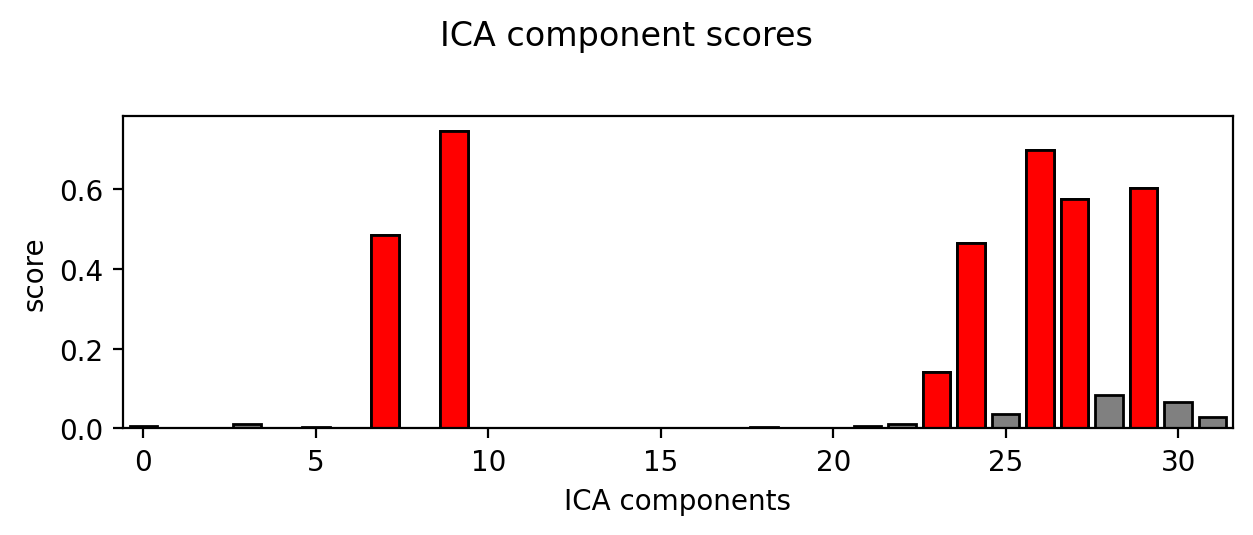

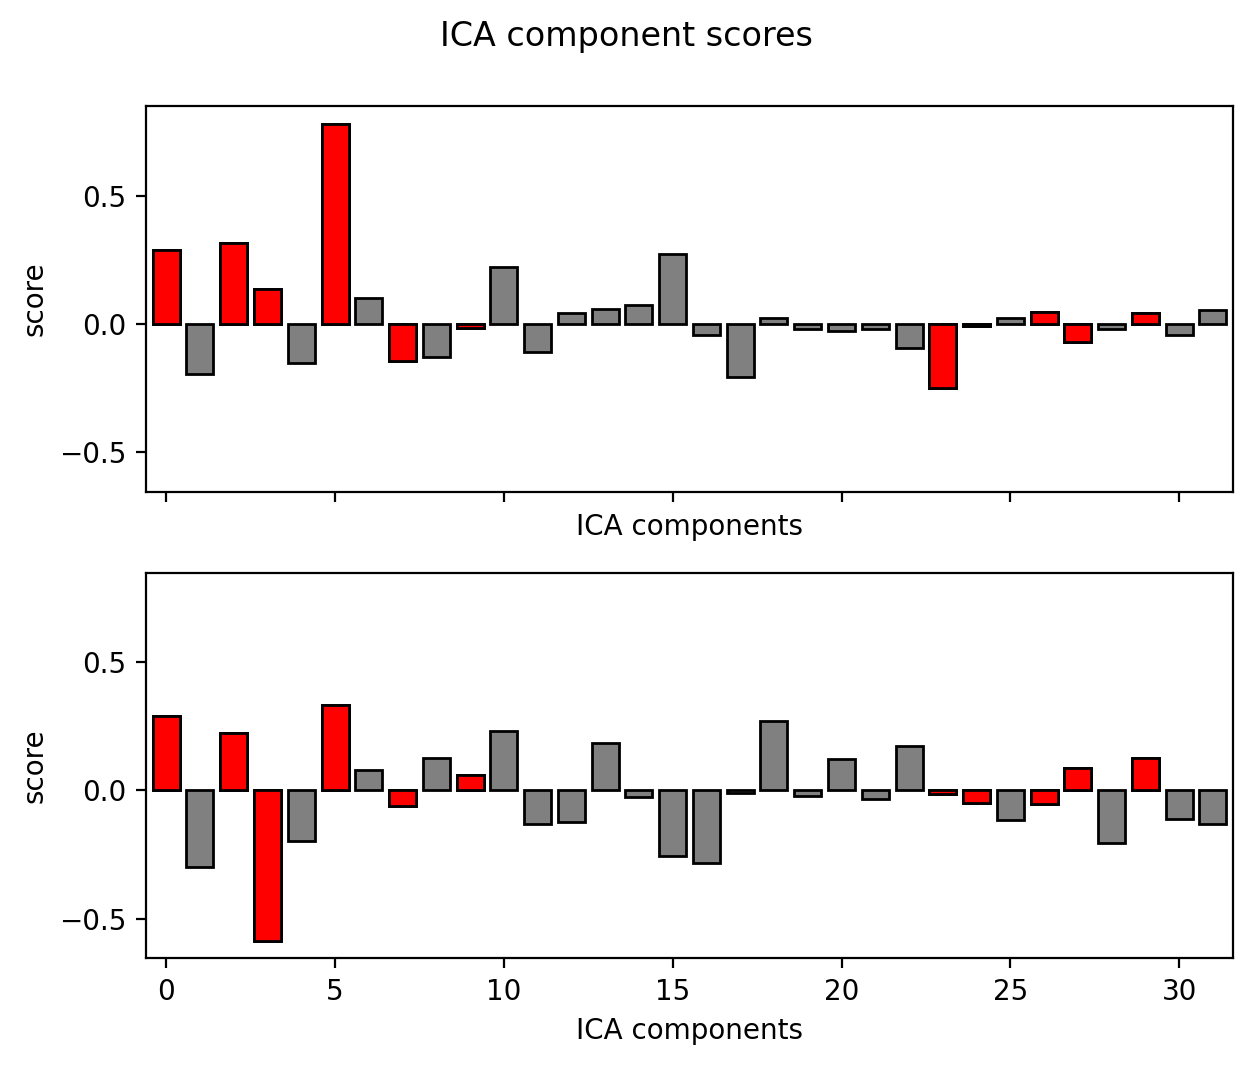

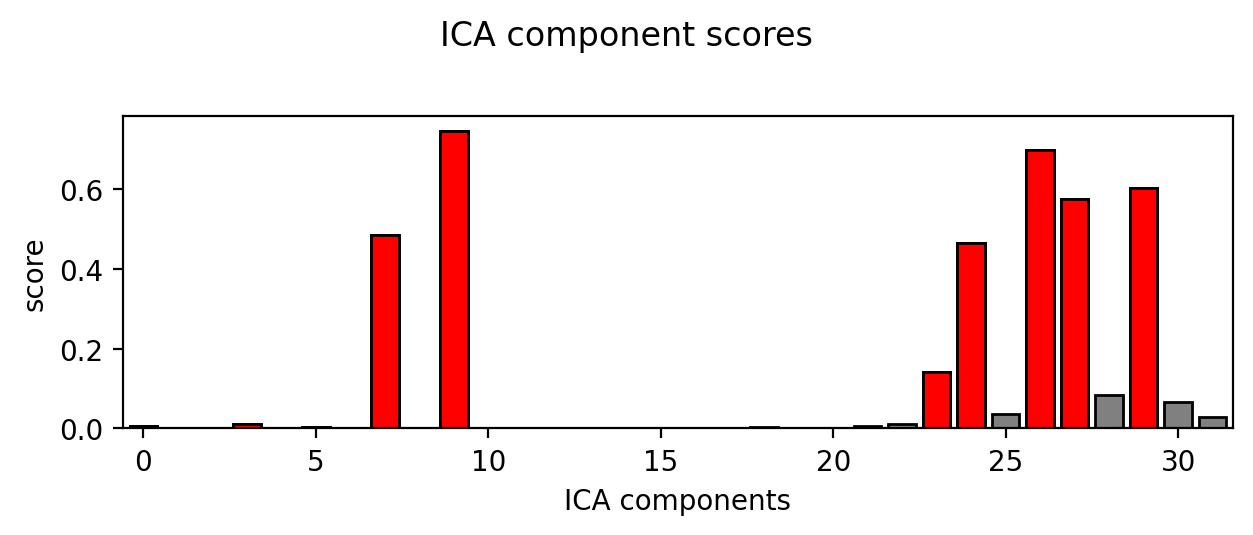

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 11 ICA components
    Projecting back using 56 PCA components


<RawEEGLAB | eyes_closed.fdt, 56 x 39428 (65.7 s), ~16.9 MB, data loaded>

In [27]:
print('[ICA] Run the ICA algorithm and exclude bad components...')
print('-'*48)

# ALWAYS make a copy!
eeg_ica = eeg_reref.copy()

# Break raw data into 1-sec epochs
tstep = 1.0 #sec
events_ica = mne.make_fixed_length_events(eeg_ica, duration=tstep)
epochs_ica = mne.Epochs(eeg_ica, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

# Autoreject noise
import autoreject
from autoreject import get_rejection_threshold

reject = get_rejection_threshold(epochs_ica)
print(reject)

# ICA parameters
random_state = 42   # ensures that your ICA decomposition produces the same results each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# ICA object
ica = ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )

# Fit ICA
ica.fit(epochs_ica,
        reject=reject,
        tstep=tstep)

# Plot components and sources - uncomment to plot more information
# ica.plot_components();
# ica.plot_properties(epochs_ica, picks=range(0, 10), psd_args={'fmax': 60});


# Identify and remove EOG artifacts from ICA components
ica_z_thresh = 1.96    # corresponds to a 5% chance of a correlation that large occurring due to chance
ch_EOG = ['FP1', 'F8'] # specify EEG channels that we want to use in place of EOG channels; we use FP1 and F8 (we only need one channel each for blinks and horizontal movements)
                       # FP1/FP2 electrodes are above the eyes; F7/F8 are close enough to the sides of the eyes to detect horizontal movements
eog_indices, eog_scores = ica.find_bads_eog(eeg_ica, 
                                            ch_name=['FP1', 'F8'], 
                                            threshold=ica_z_thresh)# find bads (EOG)

# Identify and remove muscle artifacts from ICA components
ica_z_thresh = 1.96 
emg_indices, emg_scores = ica.find_bads_muscle(eeg_ica)                                          
ica.exclude = emg_indices

ica.plot_scores(emg_scores);


# Exclude components
ica.exclude = eog_indices + emg_indices

# Plot the scores
ica.plot_scores(eog_scores);
ica.plot_scores(emg_scores);

# Cleaned data
eeg_clean = eeg_reref.copy()
ica.apply(eeg_clean)

#### Don't forget to breathe (and save your data)!

Whew! That was a lot of effort for cleaning up our data! Now that the pre-processing part is over, it is time to relax (for a second) and make an overview of our procedure.


In [50]:
# Save the ICA object; you can load it in subsequent runs if you want
# ica.save(os.path.join(data_dir, 'eyes_closed_ica.fif', overwrite=True));

# Let's keep a backup of the cleaned up EEG dataset
eeg_backup = eeg_clean.copy() # save a backup of our cleaned dataset!

---

### 6. Overview

Let's go over the procedure quickly. The whole preprocessing pipeline can be summarized in the following steps:

1. Importing the data. We used the EEGlab `.set` file format for ease of use.
2. Discarding unnecessary channels and cropping the data based on events.
3. Filtering the data: (a) lowpass (b) highpass and (c) notch filtering.
4. Downsampling to save space
5. Using ICA to find and reject organic artifacts such as eye blinks and muscle noise.
6. Re-referencing to common average.

Great! Now that all of the above is clear, can we make a function to perform all of the above automatically?

**\[Exercises\]**
* Write a function that accepts a filename and a few other key parameters and performs all of the above steps automatically.

<details>
    <summary> <b> (Hint) </b> </summary>
    Take note of the parameters to be used and read the documentation string in the provided function!
</details>

In [28]:
#Didn't manage to create a funtionable cleanup function
#Repeat manually same procesing function for eyes_open
#Importing the eyes-copen data
filename = 'eyes_open.set'
data_dir = os.path.abspath('data')
EEG_dir = os.path.join(data_dir, 'EEG_raw')
data_file = os.path.join(EEG_dir, filename)
montage_file = os.path.join(data_dir, 'ElectrodeLoc.xyz')

# Read the EEG data
eeg_raw2 = mne.io.read_raw_eeglab(data_file, ['VEOG', 'HEOG'])

Reading C:\Users\MARIA\Desktop\ProgData\mini-project 2\data\EEG_raw\eyes_open.fdt


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\2603036036.py:11: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['VEOG', 'HEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg_raw2 = mne.io.read_raw_eeglab(data_file, ['VEOG', 'HEOG'])


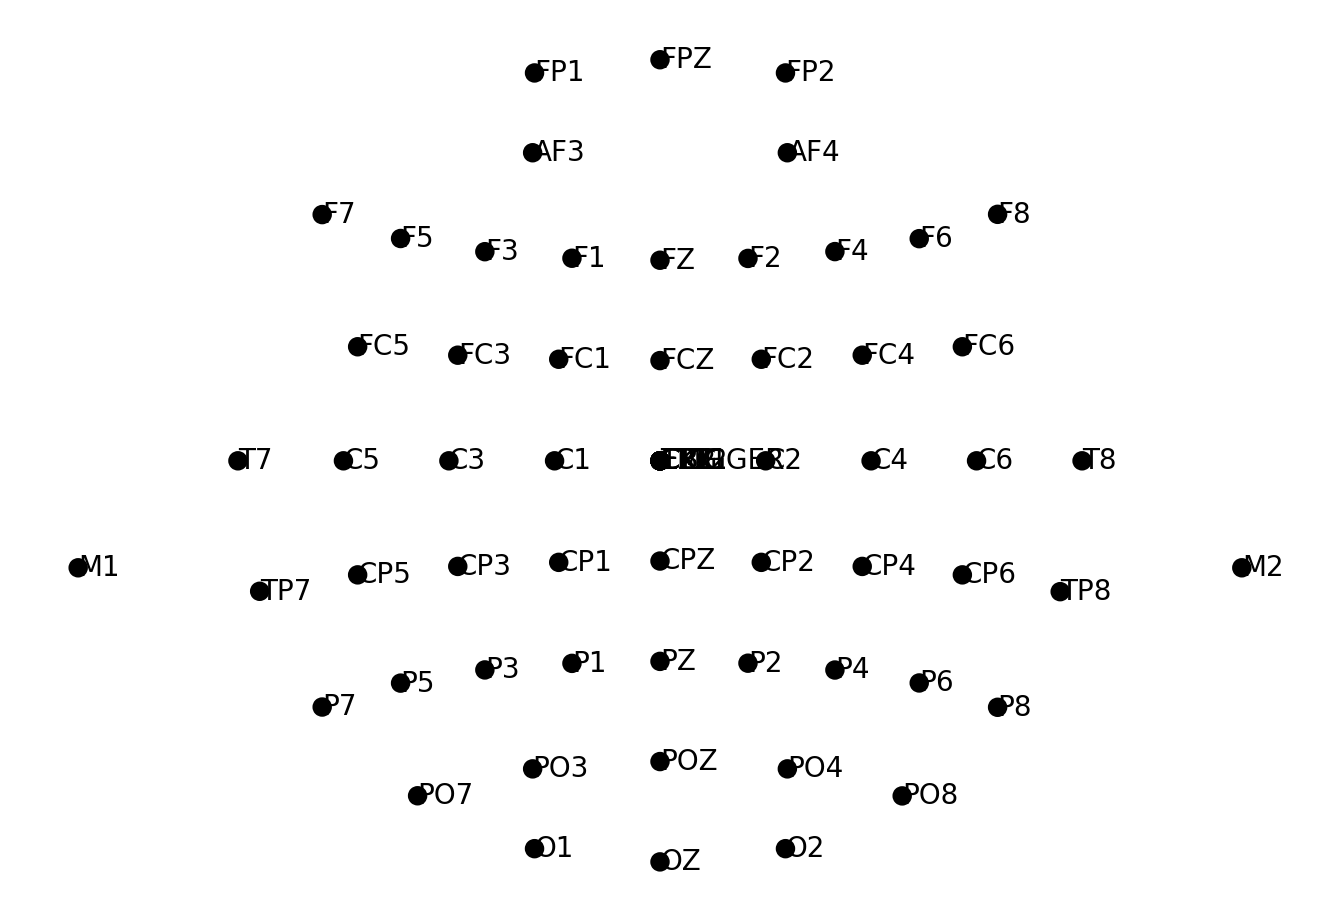

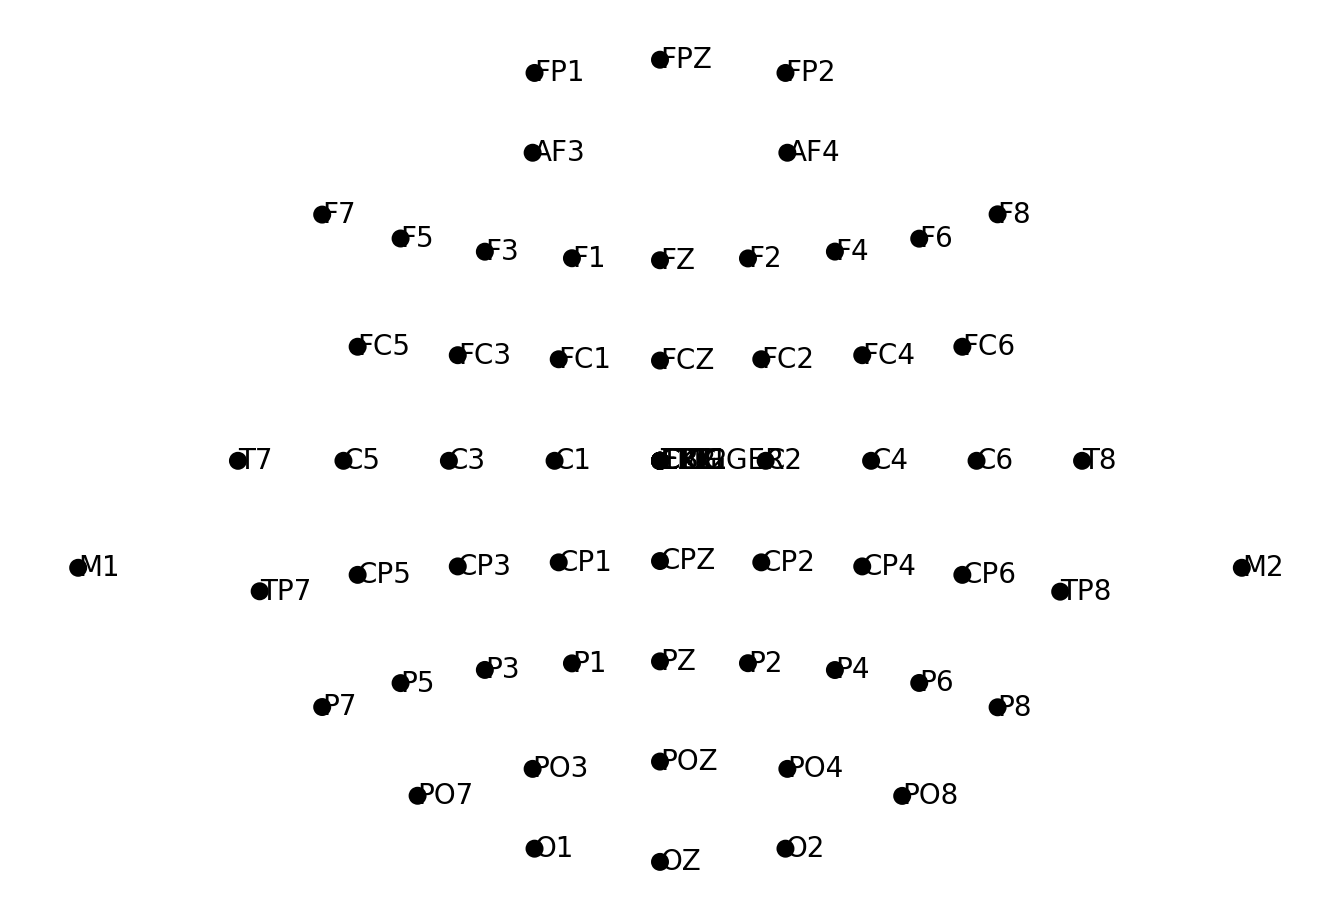

In [29]:
# Get the default montage, 2D
default_montage = eeg_raw2.get_montage()
default_montage.plot()

In [30]:
# Fix the montage size and positions
for idx in np.arange(len(default_montage.dig)):
    default_montage.dig[idx]['r'] /= 1000

In [31]:
# Set the updated montage on the dataset
eeg_raw2.set_montage(default_montage, on_missing='ignore')

<RawEEGLAB | eyes_open.fdt, 69 x 100800 (100.8 s), ~96 kB, data not loaded>

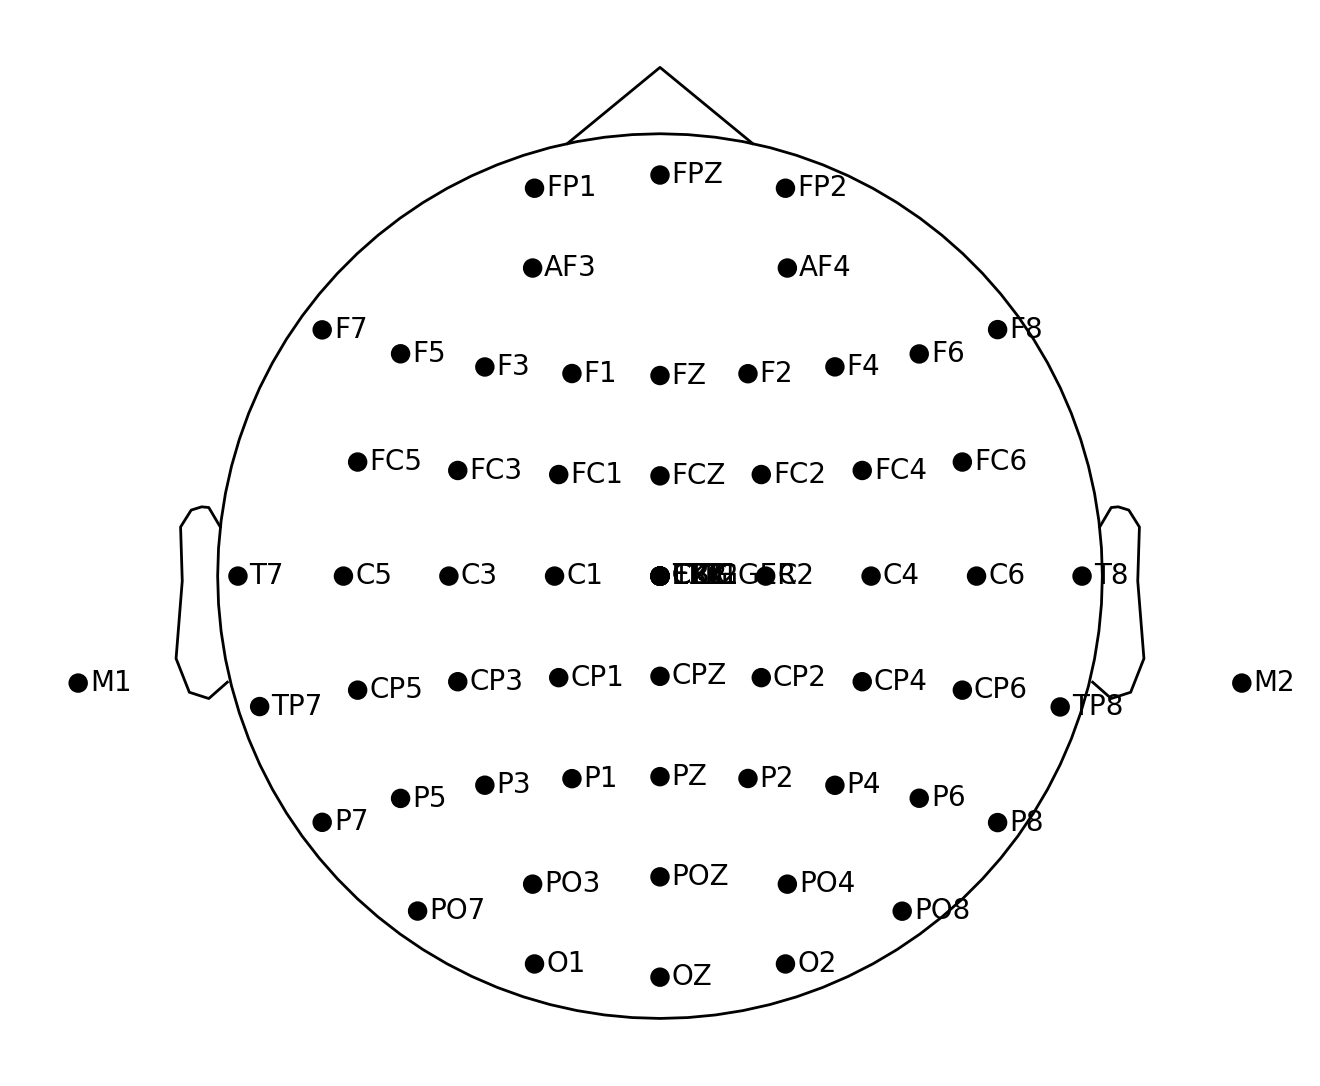

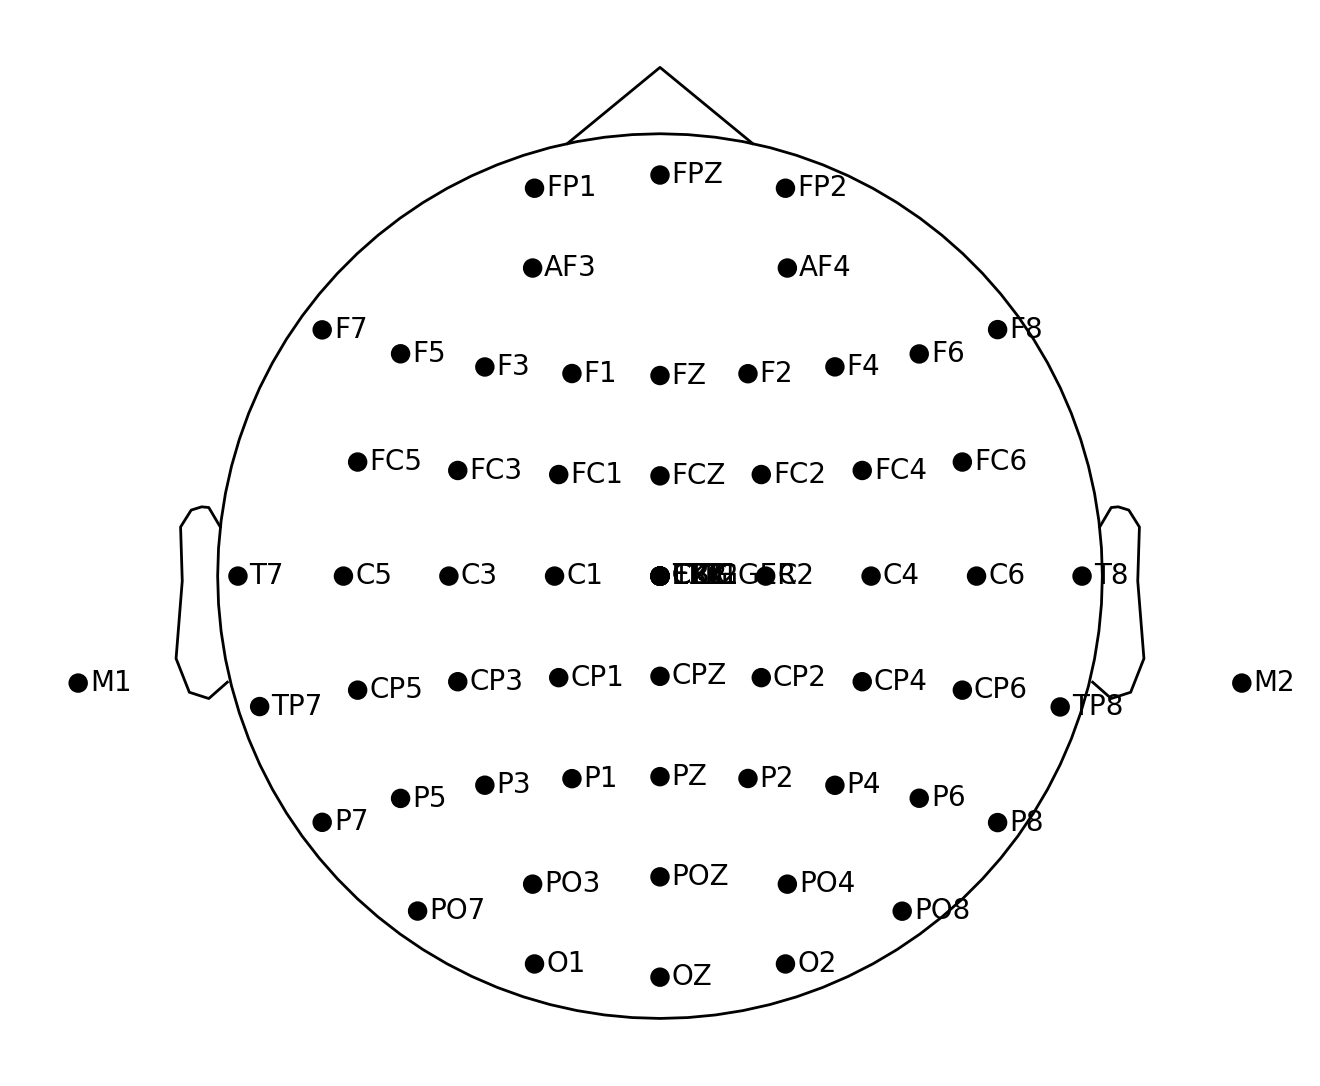

In [32]:
# Plot the sensors montage
eeg_raw2.plot_sensors(show_names=True)

In [33]:
eeg_raw2.info['ch_names']

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F11',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'F12',
 'FT11',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT12',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M1',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POZ',
 'PO4',
 'PO8',
 'O1',
 'OZ',
 'O2',
 'CB1',
 'CB2',
 'VEOG',
 'HEOG',
 'EKG',
 'EMG',
 'TRIGGER']

In [34]:
# Remove all non-EEG channels (idxs over the 64th channel)
eeg_non_EEG = eeg_raw2.copy()
eeg_corrupt = eeg_raw2.copy()
eeg_raw2_temp = eeg_raw2.copy()
print('Number of channels in raw_temp:')
print(len(eeg_raw2_temp.ch_names), end=' → drop five → ')
eeg_raw2_temp.drop_channels(['VEOG','HEOG', 'EKG', 'EMG', 'TRIGGER'])

Number of channels in raw_temp:
69 → drop five → 

<RawEEGLAB | eyes_open.fdt, 64 x 100800 (100.8 s), ~92 kB, data not loaded>

In [35]:
# Remove all channels in the list
bad_chans2 = ['F11', 'F12', 'FT11', 'FT12', 'CB1', 'CB2']
bad_chans2 += eeg_raw2.ch_names[64:]
print(bad_chans2)
eeg_raw2.drop_channels(bad_chans2, on_missing='raise')

['F11', 'F12', 'FT11', 'FT12', 'CB1', 'CB2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER']


<RawEEGLAB | eyes_open.fdt, 58 x 100800 (100.8 s), ~86 kB, data not loaded>

In [36]:
# Print all the channels that will be removed
bad_chans2 = eeg_non_EEG.ch_names + eeg_corrupt.ch_names
print('[-] Removing channels...', bad_chans2)

[-] Removing channels... ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F11', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F12', 'FT11', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT12', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M1', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER', 'FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F11', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'F12', 'FT11', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT12', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M1', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'VEOG', 'HEOG', 'EKG', 'EMG', 'TRIGGER']


In [37]:
# Apply the removal
eeg_chrm2 = eeg_raw2.copy()
print('[CH] Remaining {0} channels...'.format(len(eeg_chrm.ch_names)), eeg_chrm.ch_names)

[CH] Remaining 56 channels... ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2']


In [38]:
#filtering
# Load the data in memory - required for the filtering
eeg_filt2 = eeg_raw2.copy()
eeg_filt2.load_data()
# Low-pass filter-lower 200Hz, Higher 1Hz
eeg_filt2.filter(1,200)
# Notch filter
print('[Notch] Filtering the data...')
print('-'*32)
#numpy.arange start, stop, step
notch_freqs = np.arange(50,151,50) # Europe
eeg_filtered2 =eeg_filt2.copy()
eeg_filtered2.notch_filter(notch_freqs)

Reading 0 ... 100799  =      0.000 ...   100.799 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[Notch] Filtering the data...
--------------------------------
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.4s finished


<RawEEGLAB | eyes_open.fdt, 58 x 100800 (100.8 s), ~44.7 MB, data loaded>

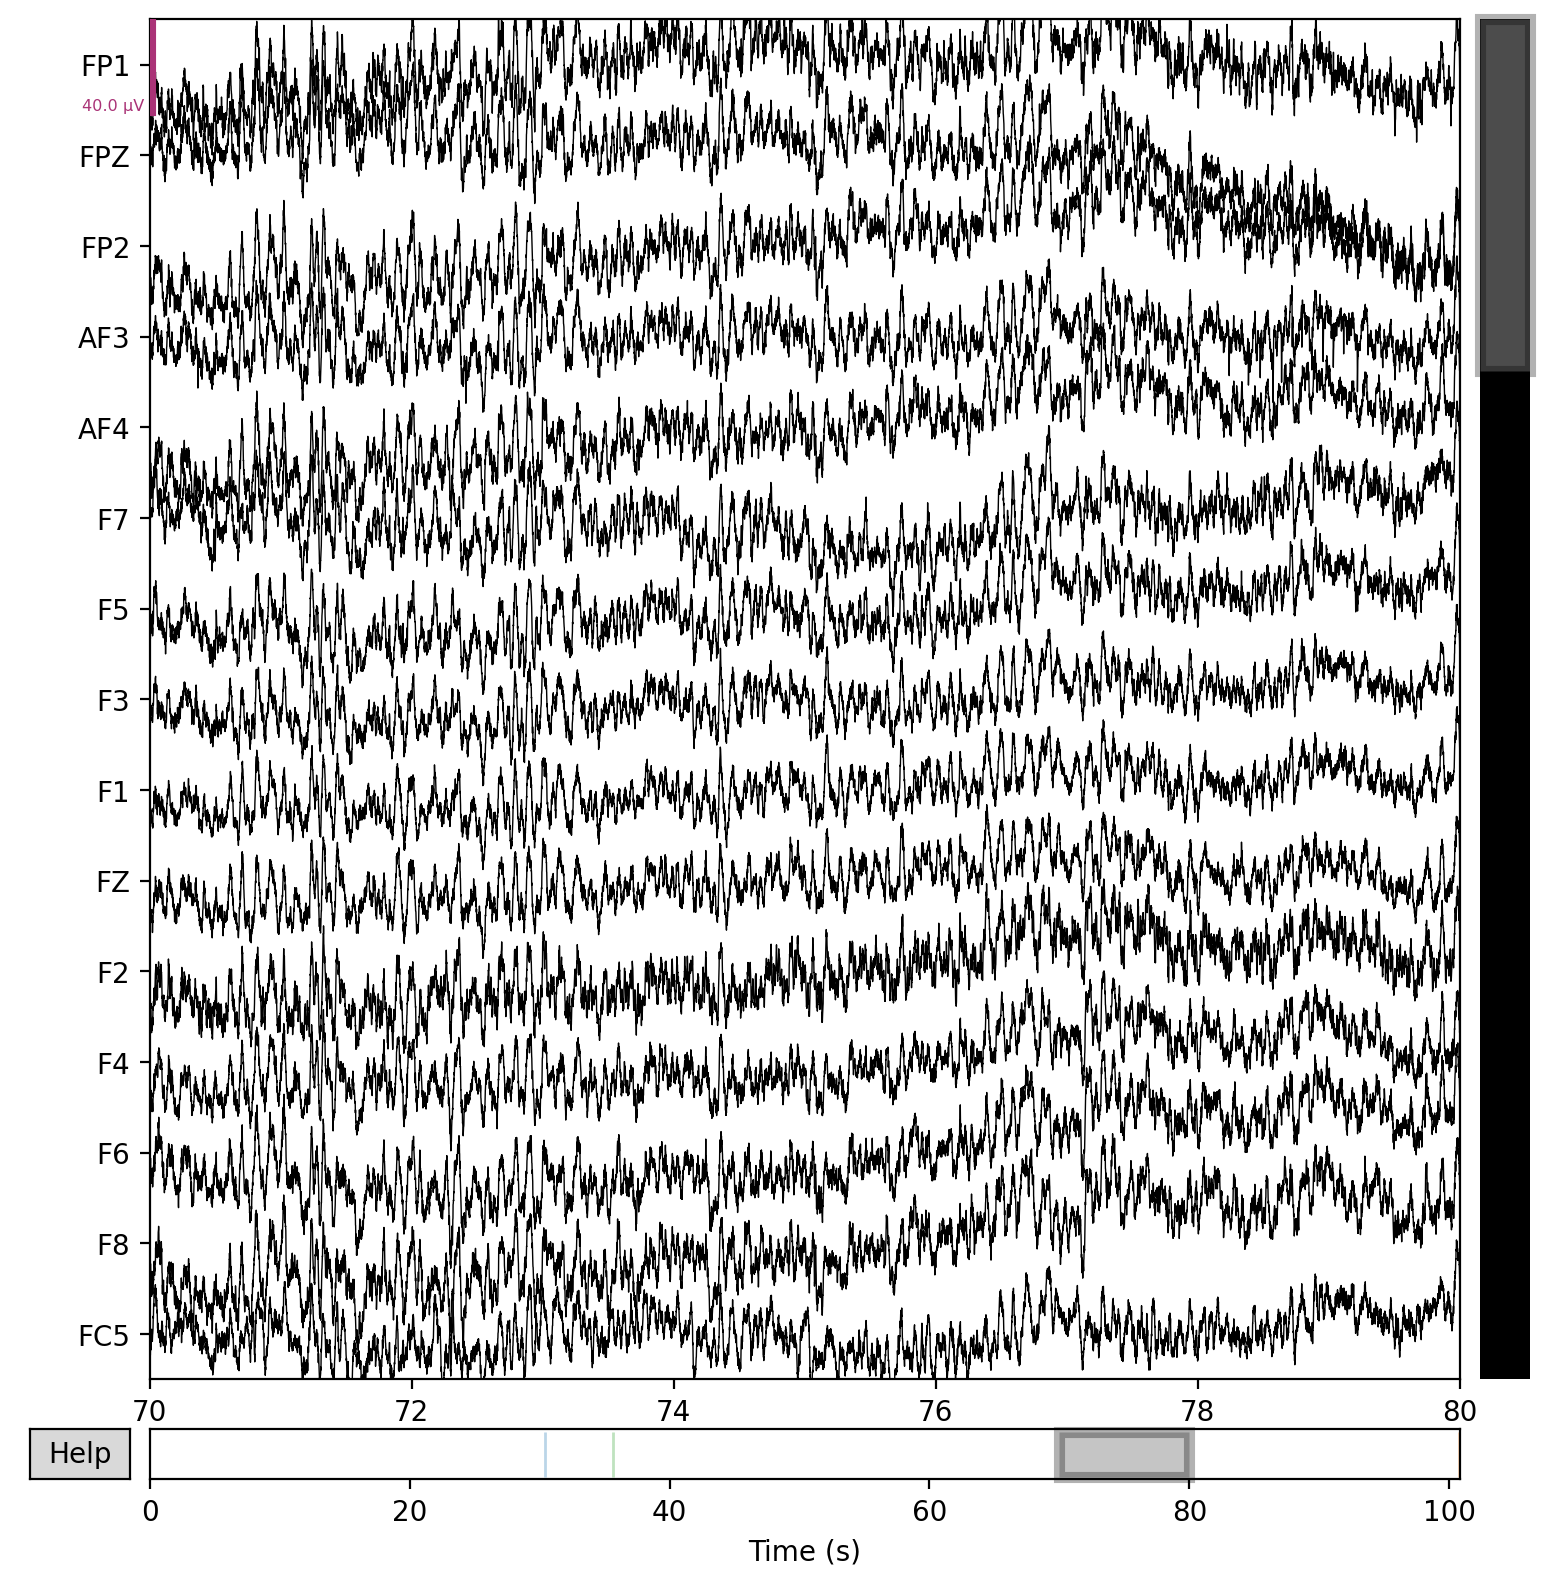

In [39]:
with mne.viz.use_browser_backend('matplotlib'):
    fig = eeg_raw2.plot(n_channels=15, start=70, duration=10)

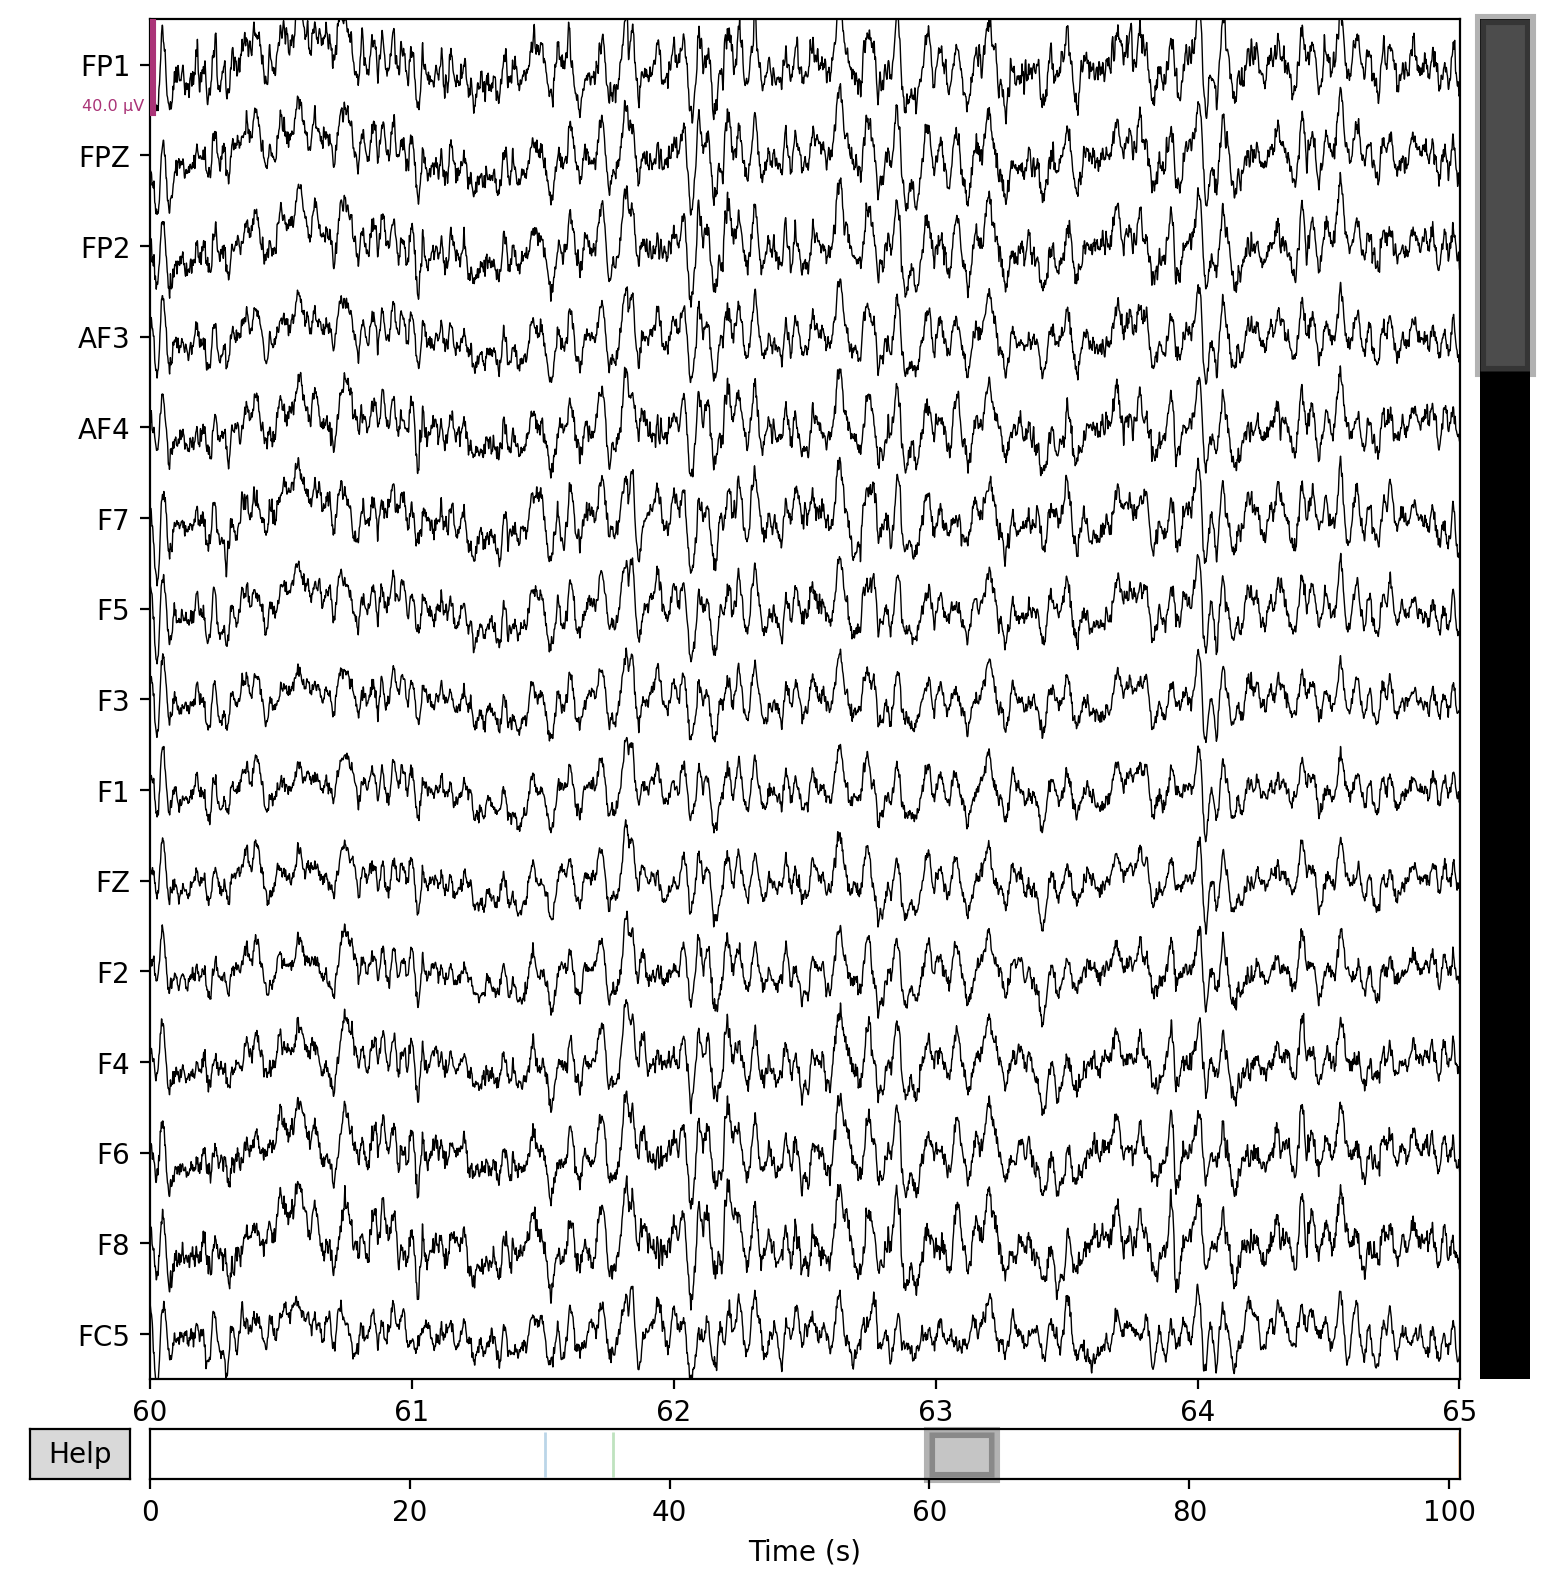

In [40]:
#visualize filtered data
with mne.viz.use_browser_backend('matplotlib'):
    fig = eeg_filtered2.plot(n_channels=15, start=60, duration=5)

In [41]:
# print("[E] Epoching the data...")
annotations = eeg_filtered2.annotations

#Print the annotations
for idx in range(len(annotations)):
    print('Annotation ID:', annotations[idx]['description'], ' onset: ', annotations[idx]['onset'], 's')

Annotation ID: 100  onset:  30.42 s
Annotation ID: 110  onset:  35.629 s
Annotation ID: 101  onset:  100.723 s


In [42]:
print(annotations)

<Annotations | 3 segments: 100 (1), 101 (1), 110 (1)>


In [43]:
for idx in range(len(annotations)):
    print(idx, annotations[idx])

0 OrderedDict([('onset', 30.42), ('duration', 0.0), ('description', '100'), ('orig_time', None)])
1 OrderedDict([('onset', 35.629), ('duration', 0.0), ('description', '110'), ('orig_time', None)])
2 OrderedDict([('onset', 100.723), ('duration', 0.0), ('description', '101'), ('orig_time', None)])


In [44]:
# Crop the data
eeg_cropped2 = eeg_filtered2.copy().crop(tmin=35.629, tmax=100.723, include_tmax=True)
print(eeg_cropped2.annotations)

<Annotations | 2 segments: 101 (1), 110 (1)>


In [45]:
#downsampling
# Our new sampling frequency
fs_new2 = 600 # in Hz

# ALWAYS make a copy!
eeg_tmp2 = eeg_cropped2.copy()

# Resampling operation here
eeg_resampled2 = eeg_tmp2.resample(600)

# Print the info of the new object
print(eeg_resampled2.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 58 EEG
 custom_ref_applied: False
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 1.0 Hz
 lowpass: 200.0 Hz
 meas_date: unspecified
 nchan: 58
 projs: []
 sfreq: 600.0 Hz
>


In [46]:
#RE-REFERENCING
print('[REF] Re-referencing the data...')
print('-'*32)

# Using average reference
ref_new2 = eeg_resampled2

# ALWAYS make a copy!
eeg_tmp2 = eeg_resampled2.copy()
eeg_tmp2.load_data()

# Re-referencing to common average operation here
eeg_reref2, ref_data2 = mne.set_eeg_reference(ref_new2,ref_channels='average')

# Print the info of the new object
print(eeg_reref2.info)

[REF] Re-referencing the data...
--------------------------------
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 58 EEG
 custom_ref_applied: True
 dig: 70 items (3 Cardinal, 67 EEG)
 highpass: 1.0 Hz
 lowpass: 200.0 Hz
 meas_date: unspecified
 nchan: 58
 projs: []
 sfreq: 600.0 Hz
>


[ICA] Run the ICA algorithm and exclude bad components...
------------------------------------------------
Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 65 events and 601 original time points ...
0 bad epochs dropped
Estimating rejection dictionary for eeg
{'eeg': 0.00011410788868480608}
Fitting ICA to data using 58 channels (please be patient, this may take a while)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\1962987410.py:32: RuntimeWarning: The following parameters passed to ICA.fit() will be ignored, as they only affect raw data (and it appears you passed epochs): reject
  ica.fit(epochs_ica,


Selecting by explained variance: 41 components
Fitting ICA took 40.0s.
Using EOG channels: FP1, F8
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Effective window size : 0.427 (s)


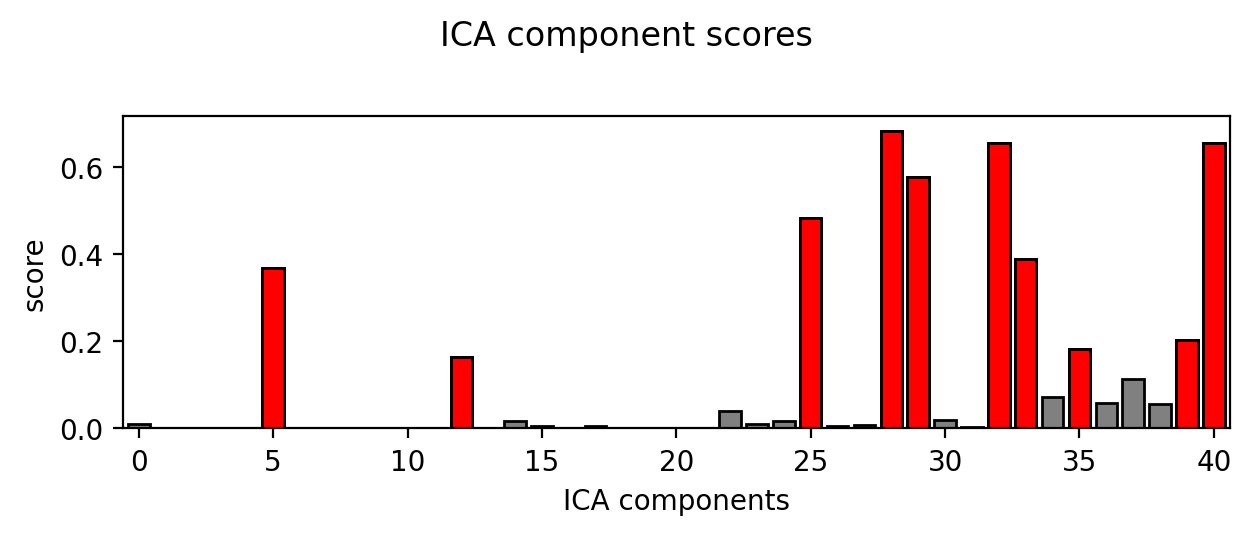

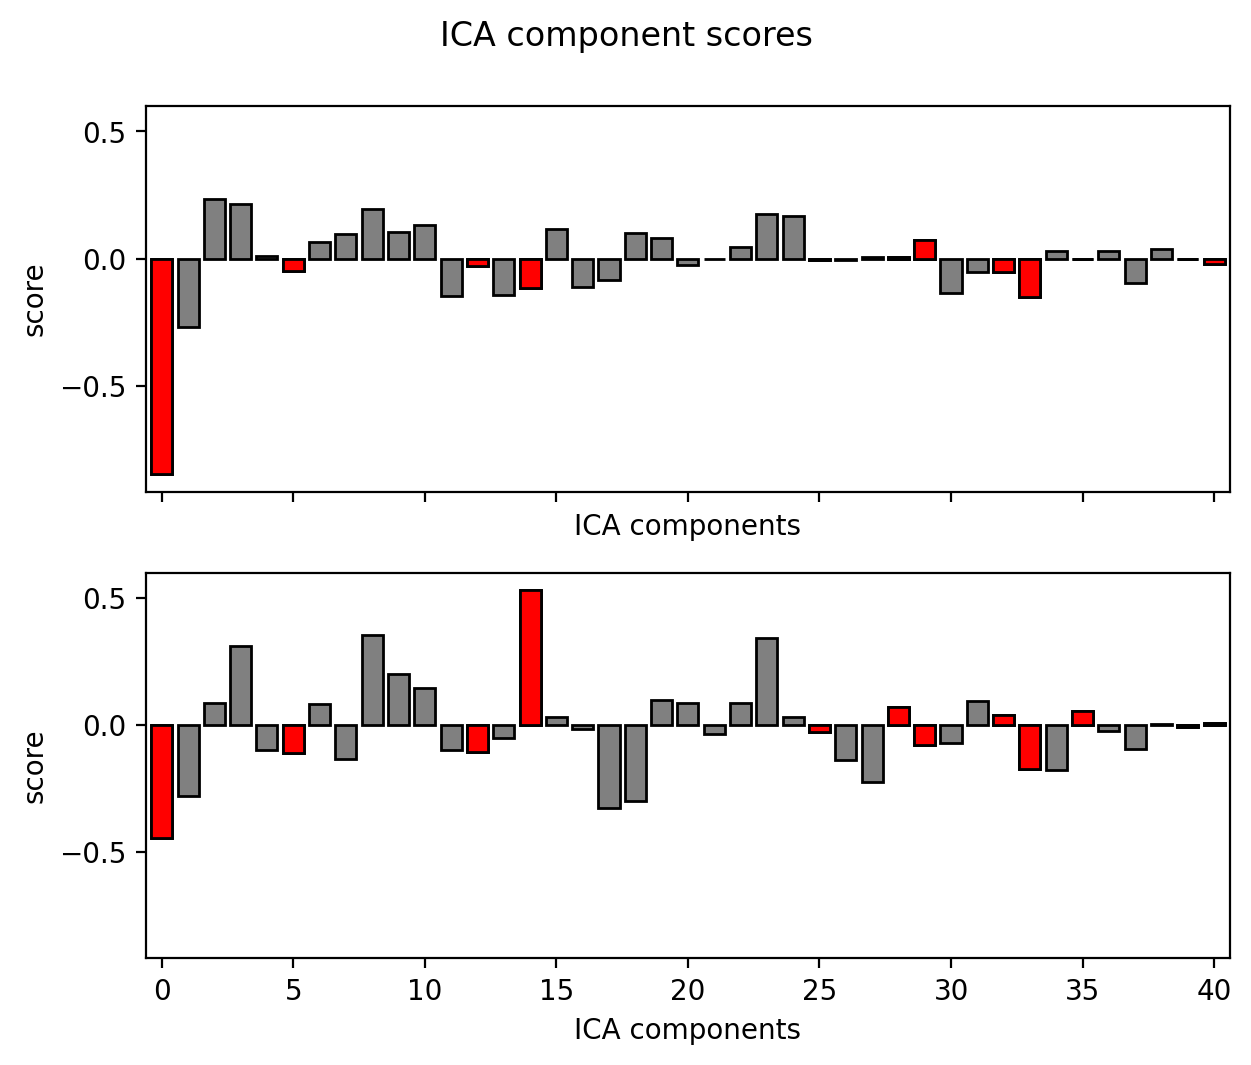

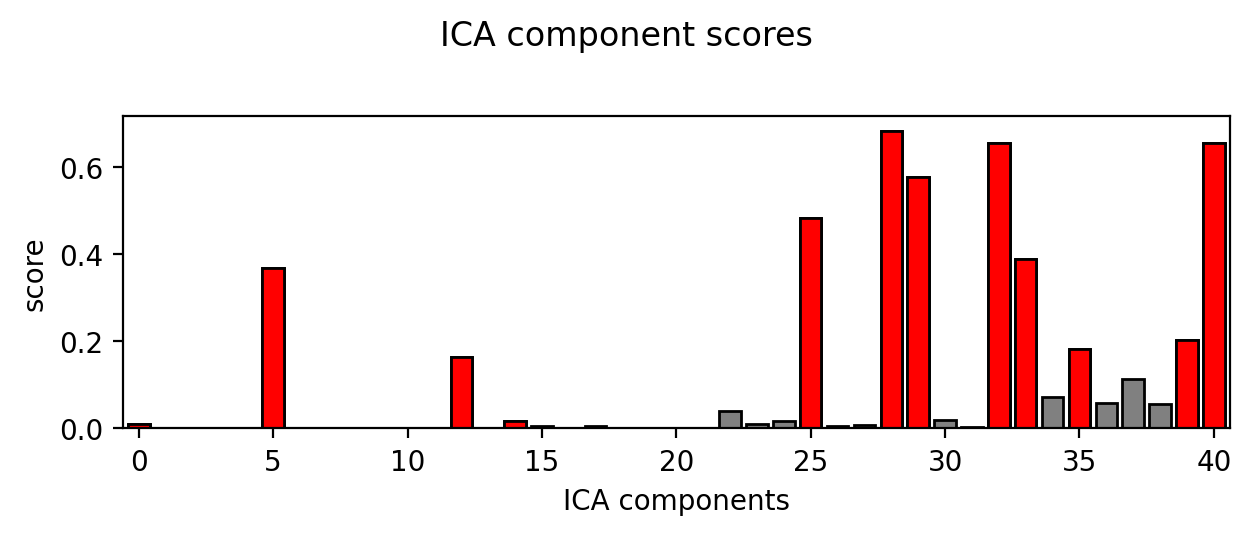

Applying ICA to Raw instance
    Transforming to ICA space (41 components)
    Zeroing out 12 ICA components
    Projecting back using 58 PCA components


<RawEEGLAB | eyes_open.fdt, 58 x 39057 (65.1 s), ~17.4 MB, data loaded>

In [47]:
print('[ICA] Run the ICA algorithm and exclude bad components...')
print('-'*48)

# ALWAYS make a copy!
eeg_ica = eeg_reref2.copy()

# Break raw data into 1-sec epochs
tstep = 1.0 #sec
events_ica = mne.make_fixed_length_events(eeg_ica, duration=tstep)
epochs_ica = mne.Epochs(eeg_ica, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

# Autoreject noise
import autoreject
from autoreject import get_rejection_threshold

reject = get_rejection_threshold(epochs_ica)
print(reject)

# ICA parameters
random_state = 42   # ensures that your ICA decomposition produces the same results each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# ICA object
ica = ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )

# Fit ICA
ica.fit(epochs_ica,
        reject=reject,
        tstep=tstep)

# Plot components and sources - uncomment to plot more information
# ica.plot_components();
# ica.plot_properties(epochs_ica, picks=range(0, 10), psd_args={'fmax': 60});


# Identify and remove EOG artifacts from ICA components
ica_z_thresh = 1.96    # corresponds to a 5% chance of a correlation that large occurring due to chance
ch_EOG = ['FP1', 'F8'] # specify EEG channels that we want to use in place of EOG channels; we use FP1 and F8 (we only need one channel each for blinks and horizontal movements)
                       # FP1/FP2 electrodes are above the eyes; F7/F8 are close enough to the sides of the eyes to detect horizontal movements
eog_indices, eog_scores = ica.find_bads_eog(eeg_ica, 
                                            ch_name=['FP1', 'F8'], 
                                            threshold=ica_z_thresh)# find bads (EOG)

# Identify and remove muscle artifacts from ICA components
ica_z_thresh = 1.96 
emg_indices, emg_scores = ica.find_bads_muscle(eeg_ica)                                          
ica.exclude = emg_indices

ica.plot_scores(emg_scores);


# Exclude components
ica.exclude = eog_indices + emg_indices

# Plot the scores
ica.plot_scores(eog_scores);
ica.plot_scores(emg_scores);

# Cleaned data
eeg_clean2 = eeg_reref2.copy()
ica.apply(eeg_clean2)

In [48]:
# Save the ICA object; you can load it in subsequent runs if you want
# ica.save(os.path.join(data_dir, 'eyes_closed_ica.fif', overwrite=True));

# Let's keep a backup of the cleaned up EEG dataset
eeg_backup2 = eeg_clean2.copy() # save a backup of our cleaned dataset!


---

### 7. A simple analysis




#### POWER SPECTRAL DENSITY (PSD)

The power spectral density (PSD) describes the distribution of power into frequency components composing that signal. For a mathematical definition (not required for this class) you can refer to the [Wiki page](https://en.wikipedia.org/wiki/Spectral_density).

To calculate the power spectral density, we will use [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method). A practical example and an explanation using SciPy can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html). Note that you can compute the PSD in whichever way you prefer, but the advised way is to use MNE's toolbox to compute and plot it.

While we won't go into too much detail about how Welch's average periodogram works, the parameters that you will use have already been given to you in the following cell in the form of a _dictionary_ that you can pass in the MNE function to compute the PSD estimate. Can you see the difference each of them makes on the output?

**\[Exercise\]** Calculate and plot the PSD of the data. What do you observe?

<details>
    <summary> <b> (Hint) </b> </summary>
    In MNE 1.2.0 you should use the function `compute_psd()` to calculate the PSD and then followed by `plot()` to plot it. 
</details>

Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


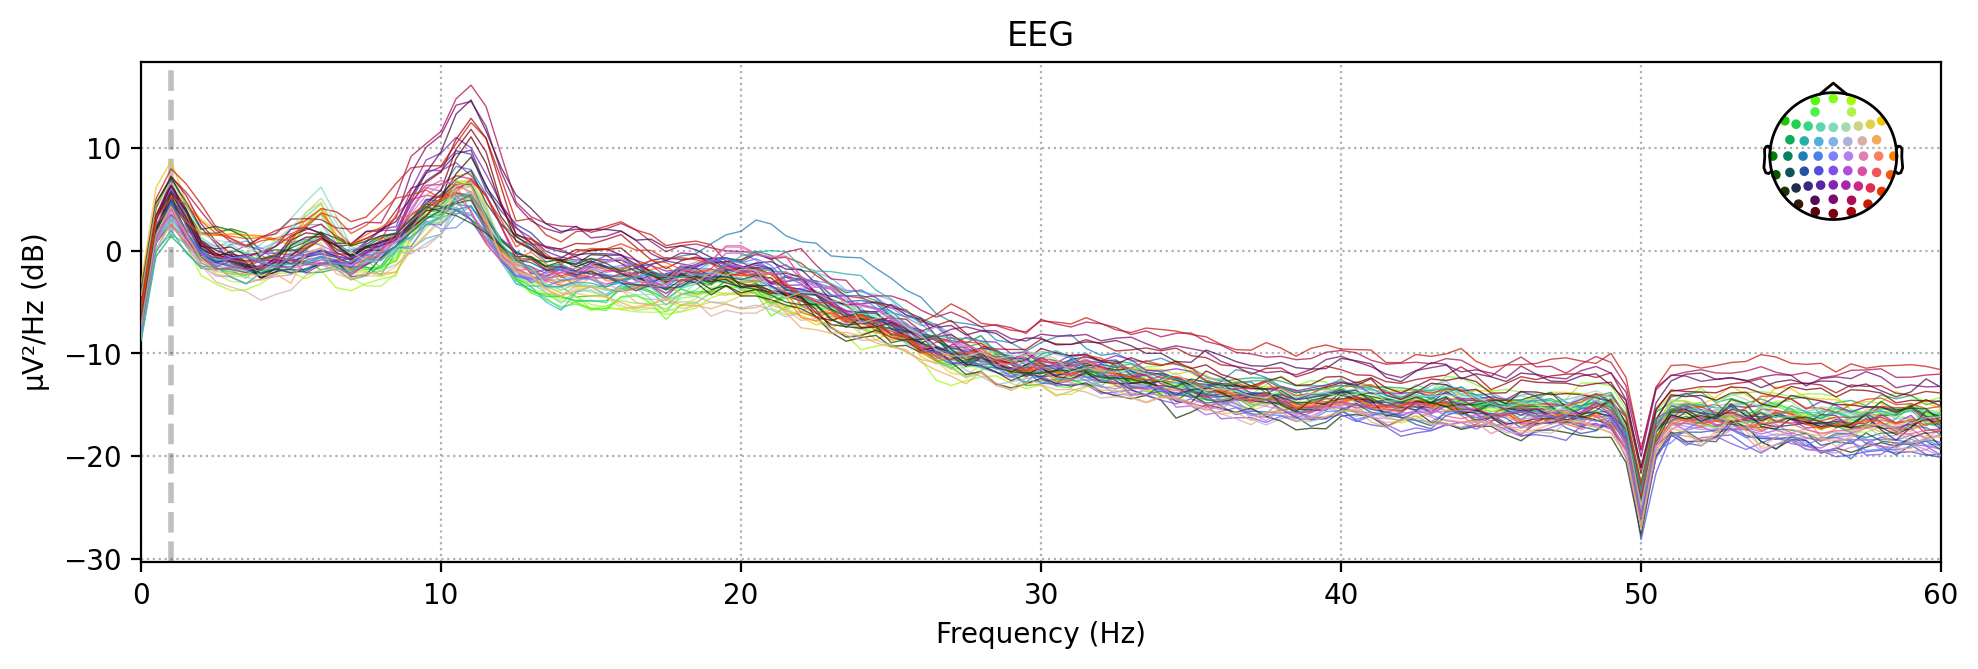

In [51]:
# Parameters to compute the PSD - eyes_closed
window_size = 2 # second
#sampling frequency indicate samples/sec
winsize_samples = 1200 # samples; how many samples are there in a 2-second window? how can you find the sampling frequency of the data?

# Window overlap - reduces noise
overlap = 0.9 # percentage
noverlap_samples = overlap*winsize_samples  # samples; how many samples do we need to set as overlapping samples to achieve 90% window overlap? 

# Make the parameters dictionary for computing and plotting the PSD
psd_parameters = dict(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples, proj=True)

# Compute the PSD of the `eyes_closed` dataset and plot it
# which function computes the PSD in the MNE toolbox? 
# how can you plot the data?
eeg_backup.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_backup.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


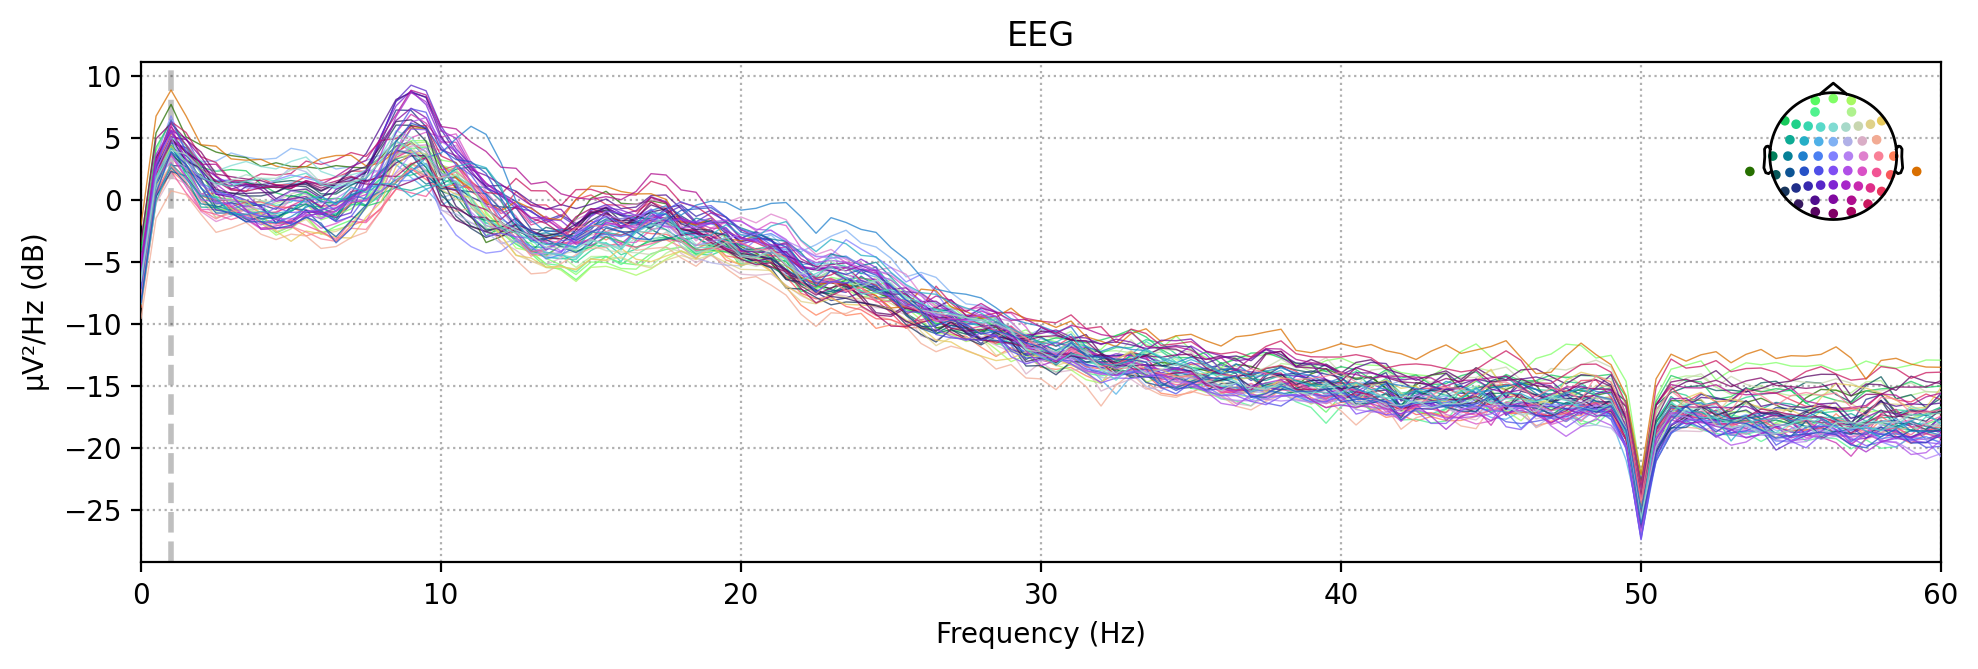

In [52]:
# Parameters to compute the PSD - eyes_open
window_size = 2 # second
#sampling frequency indicate samples/sec
winsize_samples = 1200 # samples; how many samples are there in a 2-second window? how can you find the sampling frequency of the data?

# Window overlap - reduces noise
overlap = 0.9 # percentage
noverlap_samples = overlap*winsize_samples  # samples; how many samples do we need to set as overlapping samples to achieve 90% window overlap? 

# Make the parameters dictionary for computing and plotting the PSD
psd_parameters = dict(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples, proj=True)

# Compute the PSD of the `eyes_closed` dataset and plot it
# which function computes the PSD in the MNE toolbox? 
# how can you plot the data?
eeg_backup2.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_backup2.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

As a sidenote, we can compute the PSD over specific groups of sensors. Let's take the following cases:

1. Frontal vs Posterior
2. Left vs Right

EEG sensors are named after their location and numbered according to their left-right-ness. Frontal electrodes names start with an 'F'. Central electrodes start with a 'C'. Posterior electrodes start with 'P'. To get the sensors on the _left_ side of the head, you get the channel names that end in an odd number (1,3,5,...). To get the sensors on the _right_ side of the head, you get the even-numbered channels (0,2,4,...).

**\[Exercises\]** Using the information above, calculate the following:
* Group the sensors according to their groups (frontal vs posterior and left vs right).
* Calculate and plot the PSDs
* At what frequency is the prominent peak located?

Creating RawArray with float64 data, n_channels=4, n_times=39428
    Range : 38290 ... 77717 =     63.817 ...   129.528 secs
Ready.
Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\3798738912.py:20: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_avg_all.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


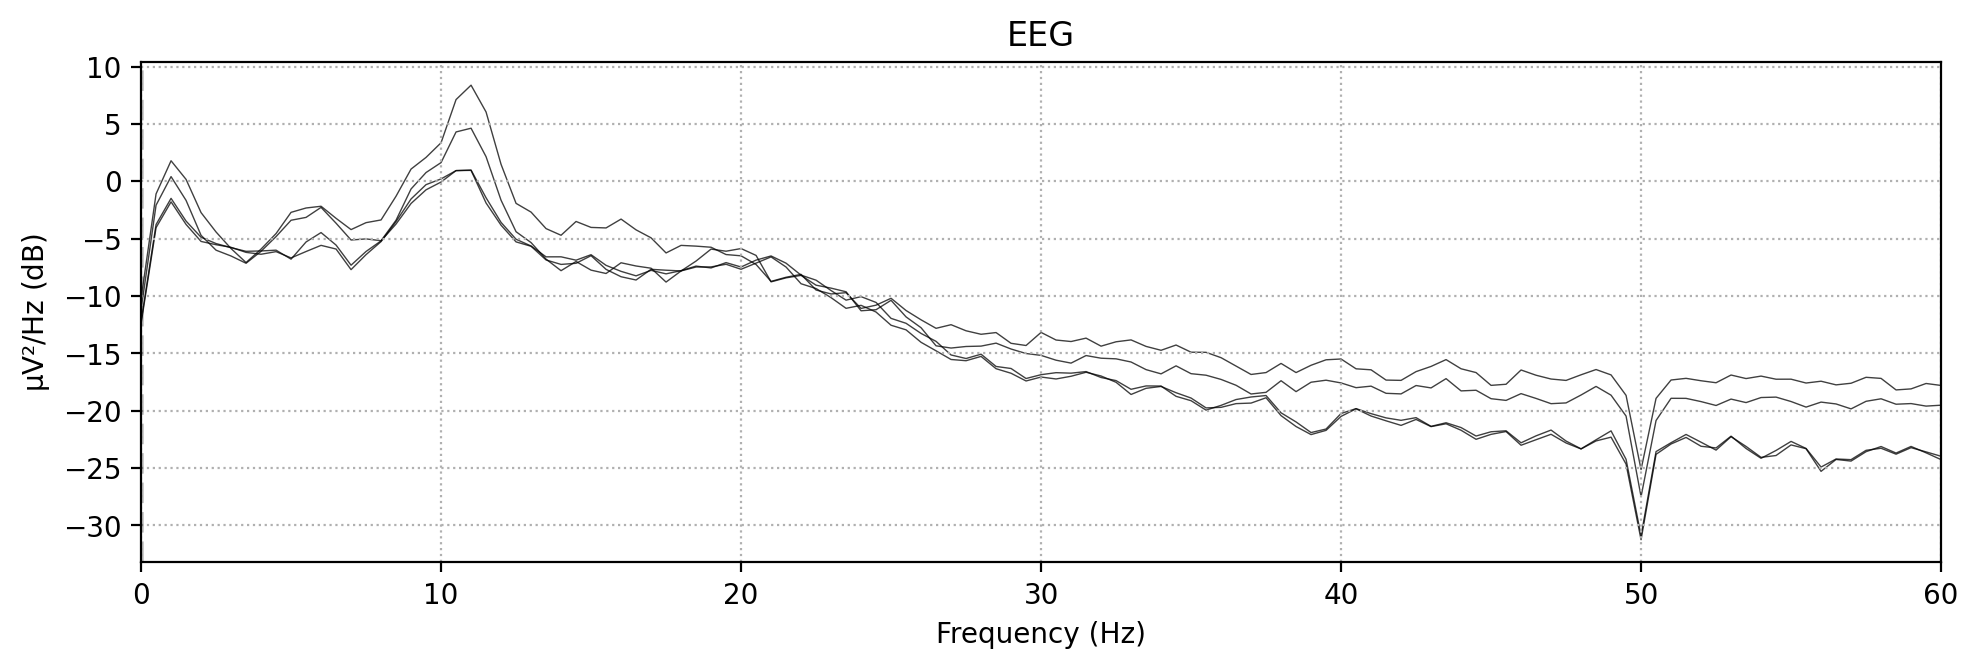

In [57]:
#eyes_closed
# Frontal
regexp_f = r'^[fFaA].*' # regular expression; you can use the function pick_channels_regexp
front_idx = mne.pick_channels_regexp(eeg_backup.ch_names, regexp=regexp_f)
# Posterior
regexp_p = r'^[pPoO].*'
post_idx = mne.pick_channels_regexp(eeg_backup.ch_names, regexp=regexp_p)
# Left
regexp_l = r'\w*[13579]$'
left_idx = mne.pick_channels_regexp(eeg_backup.ch_names, regexp=regexp_l)
# Right
regexp_r = r'\w*[02468]$'
right_idx = mne.pick_channels_regexp(eeg_backup.ch_names, regexp=regexp_r)
# Average per area
groups = dict(Front=front_idx, Post=post_idx, Left=left_idx, Right=right_idx) # make a dictionary as required in the combine_channels function
# Average traces - combine channels
eeg_avg_all = mne.channels.combine_channels(inst=eeg_backup,groups=groups)
#Compute the PSD and plot it
eeg_avg_all.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_avg_all.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

Creating RawArray with float64 data, n_channels=4, n_times=39057
    Range : 21377 ... 60433 =     35.628 ...   100.722 secs
Ready.
Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\3795221404.py:20: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_avg_all2.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


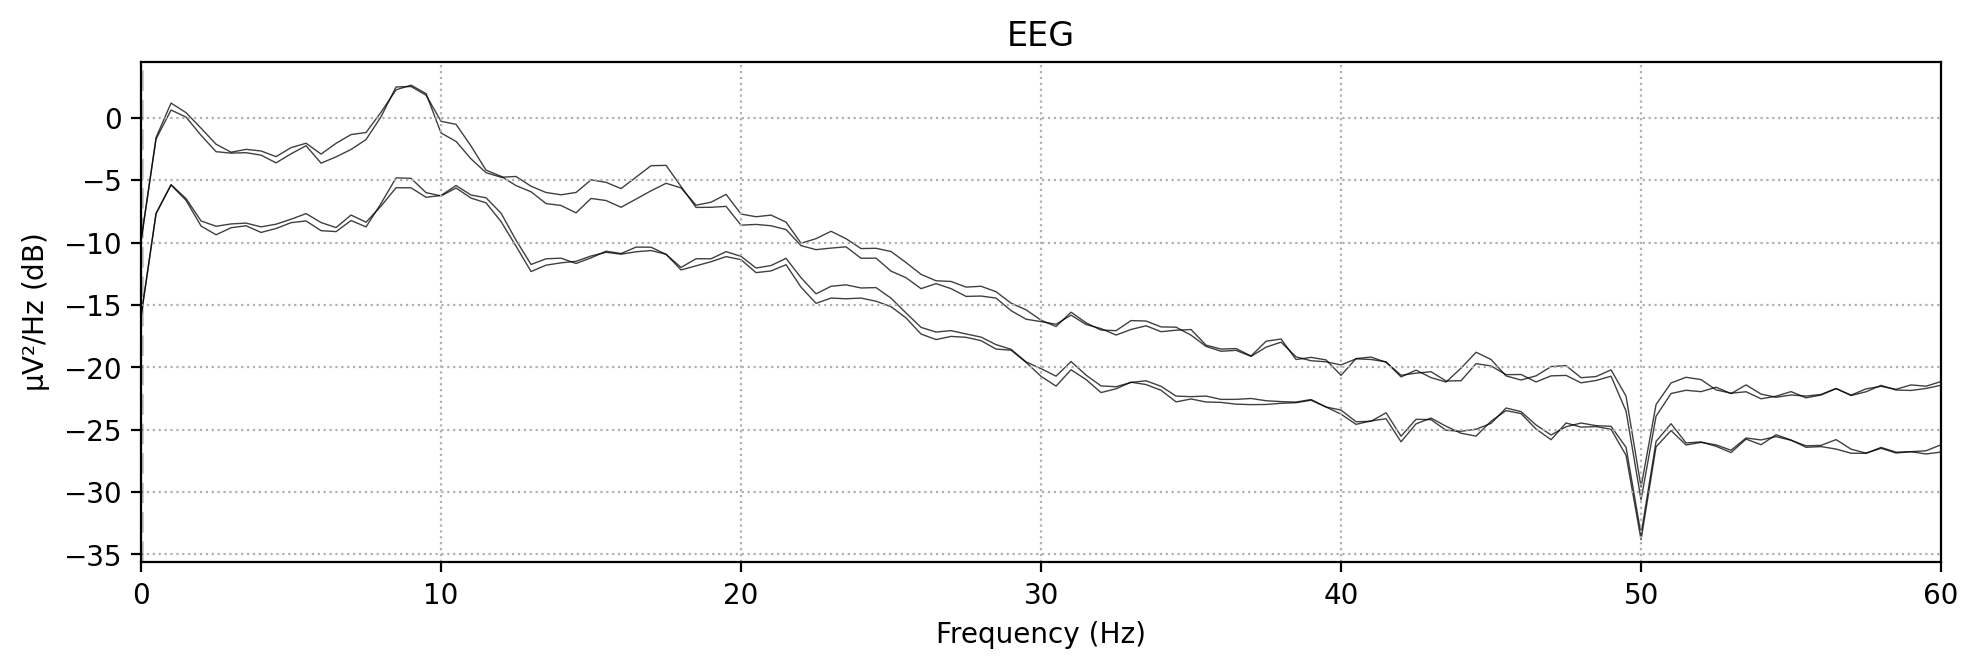

In [58]:
#eyes_open
# Frontal
regexp_f2 = r'^[fFaA].*' # regular expression; you can use the function pick_channels_regexp
front_idx2 = mne.pick_channels_regexp(eeg_backup2.ch_names, regexp=regexp_f)
# Posterior
regexp_p2 = r'^[pPoO].*'
post_idx2 = mne.pick_channels_regexp(eeg_backup2.ch_names, regexp=regexp_p)
# Left
regexp_l2 = r'\w*[13579]$'
left_idx2 = mne.pick_channels_regexp(eeg_backup2.ch_names, regexp=regexp_l)
# Right
regexp_r2 = r'\w*[02468]$'
right_idx2 = mne.pick_channels_regexp(eeg_backup2.ch_names, regexp=regexp_r)
# Average per area
groups2 = dict(Front=front_idx, Post=post_idx, Left=left_idx, Right=right_idx) # make a dictionary as required in the combine_channels function
# Average traces - combine channels
eeg_avg_all2 = mne.channels.combine_channels(inst=eeg_backup2,groups=groups)
#Compute the PSD and plot it
eeg_avg_all2.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_avg_all2.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

**Answer:**

### 8. Comparison of eyes open vs eyes closed

Great! Now that we have a pipeline in place for reading and cleaning our data, let's try to compare two different datasets.

**\[Exercises\]** Read the dataset `eyes_closed.set` and run the analysis pipeline.
* Calculate and plot the PSD.
* Compare the `eyes_closed` to the `eyes_open` conditions. What do you see? Is there a particular rhythm more prevalent in one of the conditions?

<details>
    <summary> <b> (Hint) </b> </summary>
    You are looking for a difference in the PSDs in the form of a prevalent peak around a certain frequency. In the literature, you can easily find the main difference between EEG rhythms for eyes open and eyes closed.
</details>

**Answer:**

Creating RawArray with float64 data, n_channels=1, n_times=39428
    Range : 38290 ... 77717 =     63.817 ...   129.528 secs
Ready.
Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\2048224047.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_avg_all.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


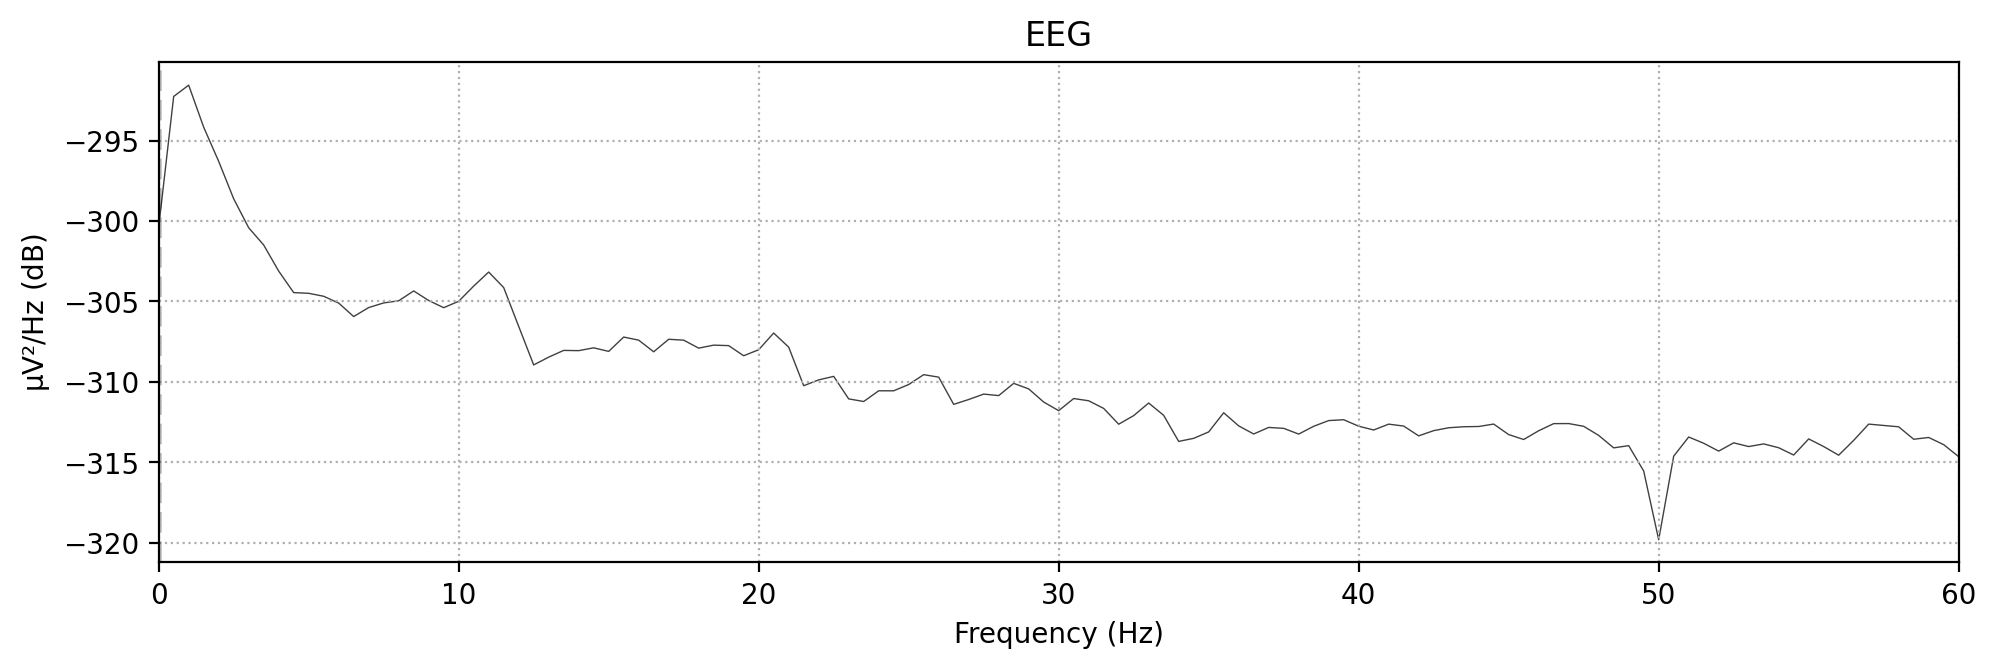

In [70]:
#eyes_closed
# Get a copy of the previously-analyzed data
eeg_eyes_closed = eeg_backup.copy()
# Average all channels per condition
# we made a dictionary above to select channels based on their location; let's make a new one for All channels
regexp = '^'
all_channels_idx= mne.pick_channels_regexp(eeg_backup.ch_names, regexp=regexp)
groups = dict(all_channels= all_channels_idx)
eeg_avg_all = mne.channels.combine_channels(inst=eeg_backup,groups=groups)
# Compute the PSDs of the two conditions
eeg_eyes_closed_PSD = eeg_avg_all.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_avg_all.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

Creating RawArray with float64 data, n_channels=1, n_times=39057
    Range : 21377 ... 60433 =     35.628 ...   100.722 secs
Ready.
Effective window size : 2.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\MARIA\AppData\Local\Temp\ipykernel_56804\309069444.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_avg_all2.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
C:\Users\MARIA\anaconda3\envs\mne\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


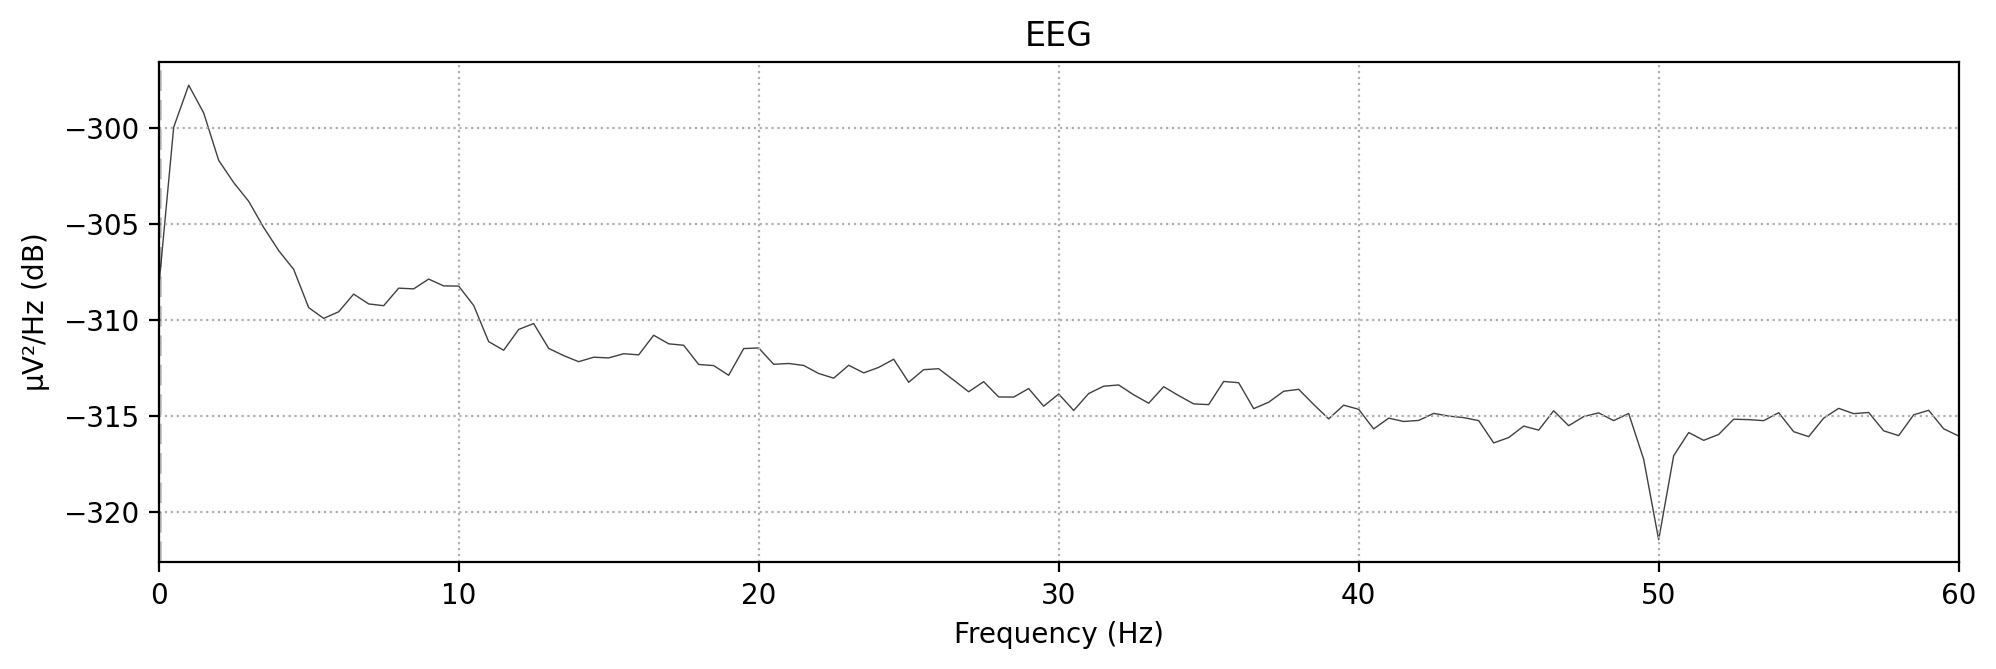

In [71]:
#eyes_open
# Get a copy of the previously-analyzed data
eeg_eyes_open = eeg_backup2.copy()
# Average all channels per condition
# we made a dictionary above to select channels based on their location; let's make a new one for All channels
regexp2 = '^'
all_channels_idx2= mne.pick_channels_regexp(eeg_backup2.ch_names, regexp=regexp2)
groups = dict(all_channels= all_channels_idx2)
eeg_avg_all2 = mne.channels.combine_channels(inst=eeg_backup2,groups=groups)
# Compute the PSDs of the two conditions
eeg_eyes_open_PSD = eeg_avg_all2.compute_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
eeg_avg_all2.plot_psd(method='welch', fmax=60, n_fft=winsize_samples, n_overlap=noverlap_samples)
plt.show()

Great! Now that we have plotted the two averaged PSDs, what do you notice? Do you see the peak in the `eyes_closed` condition? At what frequency?

---

### 9. Outro

Great work completing the EEG project! We hope you learned the basics of (pre-)processing EEG data and encourage you to play more with the pipeline you developed and personalize it on your own datasets.